In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data
std = pd.read_csv('time_std.csv')
e7 = pd.read_csv('time_e7.csv')

std = std[['date','cost_mean','cost_median','cost_sum','usage']]
e7 = e7[['date','cost_mean','cost_median','cost_sum','usage']]

In [3]:
# groupby 'date', and use the mean value to analysis
std_low = std[std['usage']=='low'][['date','cost_mean']].groupby('date').mean()
std_med = std[std['usage']=='med'][['date','cost_mean']].groupby('date').mean()
std_hig = std[std['usage']=='hig'][['date','cost_mean']].groupby('date').mean()

e7_low = e7[e7['usage']=='low'][['date','cost_mean']].groupby('date').mean()
e7_med = e7[e7['usage']=='med'][['date','cost_mean']].groupby('date').mean()
e7_hig = e7[e7['usage']=='hig'][['date','cost_mean']].groupby('date').mean()

In [4]:
std_low.index = pd.to_datetime(std_low.index)
std_med.index = pd.to_datetime(std_med.index)
std_hig.index = pd.to_datetime(std_hig.index)

e7_low.index=pd.to_datetime(e7_low.index)
e7_hig.index=pd.to_datetime(e7_hig.index)
e7_med.index=pd.to_datetime(e7_med.index)

std_low.reset_index(inplace=True)
std_med.reset_index(inplace=True)
std_hig.reset_index(inplace=True)

e7_low.reset_index(inplace=True)
e7_med.reset_index(inplace=True)
e7_hig.reset_index(inplace=True)

In [6]:
# Create confidence level
std_low['low_CI'] = std_low['cost_mean'] -  np.std(std_low['cost_mean'])
std_low['upper_CI'] = std_low['cost_mean'] + np.std(std_low['cost_mean'])

std_med['low_CI'] = std_med['cost_mean'] -  np.std(std_med['cost_mean'])
std_med['upper_CI'] = std_med['cost_mean'] + np.std(std_med['cost_mean'])

std_hig['low_CI'] = std_hig['cost_mean'] -  np.std(std_hig['cost_mean'])
std_hig['upper_CI'] = std_hig['cost_mean'] + np.std(std_hig['cost_mean'])

e7_low['low_CI'] = e7_low['cost_mean'] -  np.std(e7_low['cost_mean'])
e7_low['upper_CI'] = e7_low['cost_mean'] + np.std(e7_low['cost_mean'])

e7_med['low_CI'] = e7_med['cost_mean'] -  np.std(e7_med['cost_mean'])
e7_med['upper_CI'] = e7_med['cost_mean'] + np.std(e7_med['cost_mean'])

e7_hig['low_CI'] = e7_hig['cost_mean'] -  np.std(e7_hig['cost_mean'])
e7_hig['upper_CI'] = e7_hig['cost_mean'] + np.std(e7_hig['cost_mean'])

std_low = std_low[std_low['date']>='20120201']
std_med = std_med[std_med['date']>='20120201']
std_hig = std_hig[std_hig['date']>='20120201']

e7_low = e7_low[e7_low['date']>='20120201']
e7_med = e7_med[e7_med['date']>='20120201']
e7_hig = e7_hig[e7_hig['date']>='20120201']

## Overview

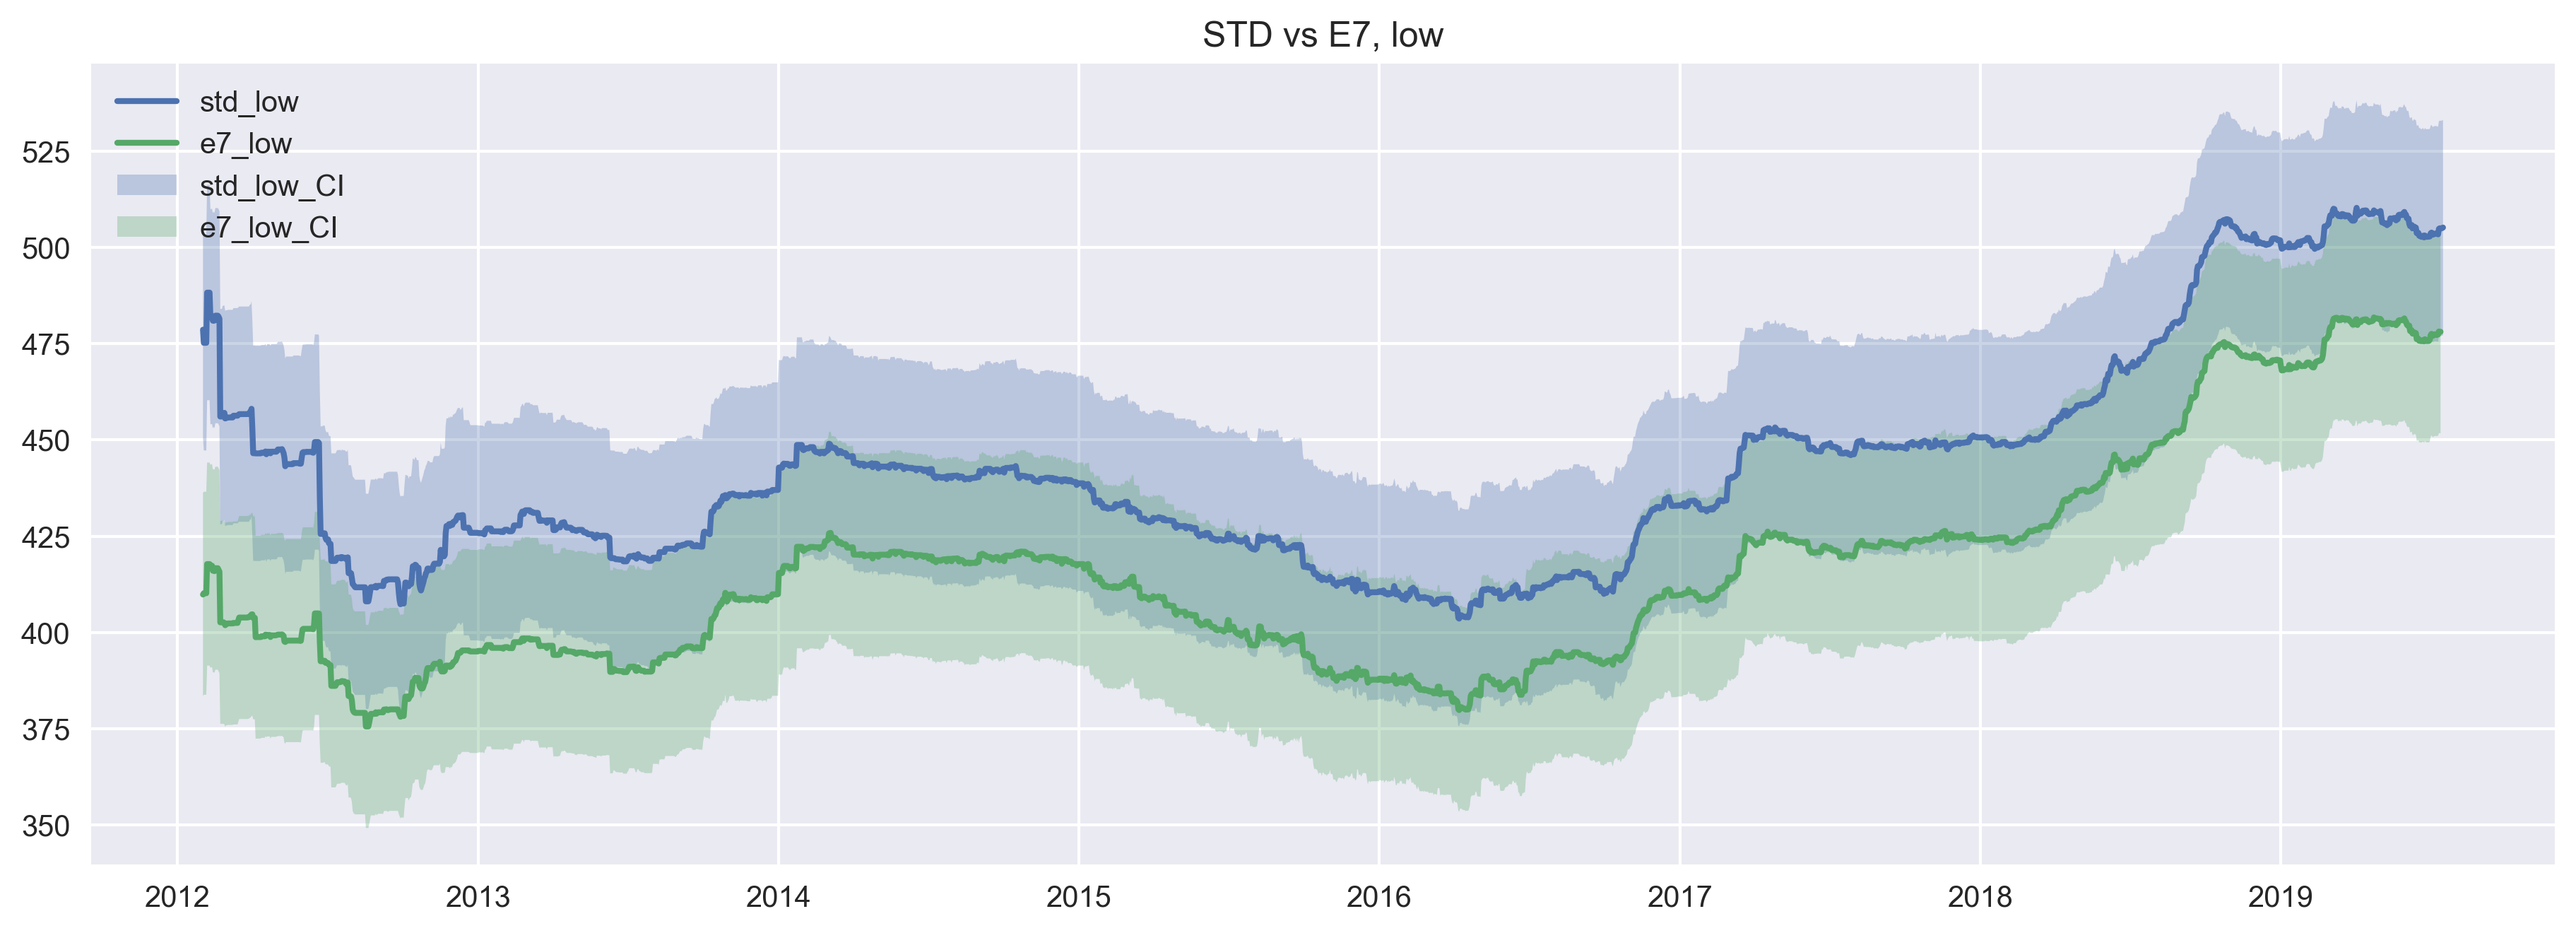

In [7]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_low['date'],std_low['cost_mean'],lw=2, alpha = 1,label='std_low')
plt.fill_between(std_low['date'], std_low['low_CI'], std_low['upper_CI'],  alpha = 0.3,label='std_low_CI')

plt.plot(e7_low['date'],e7_low['cost_mean'],lw=2, alpha = 1,label='e7_low')
plt.fill_between(e7_low['date'], e7_low['low_CI'], e7_low['upper_CI'],  alpha = 0.3,label='e7_low_CI')
plt.title('STD vs E7, low')
plt.legend(loc='best',fontsize=10)
plt.savefig('low.jpg')

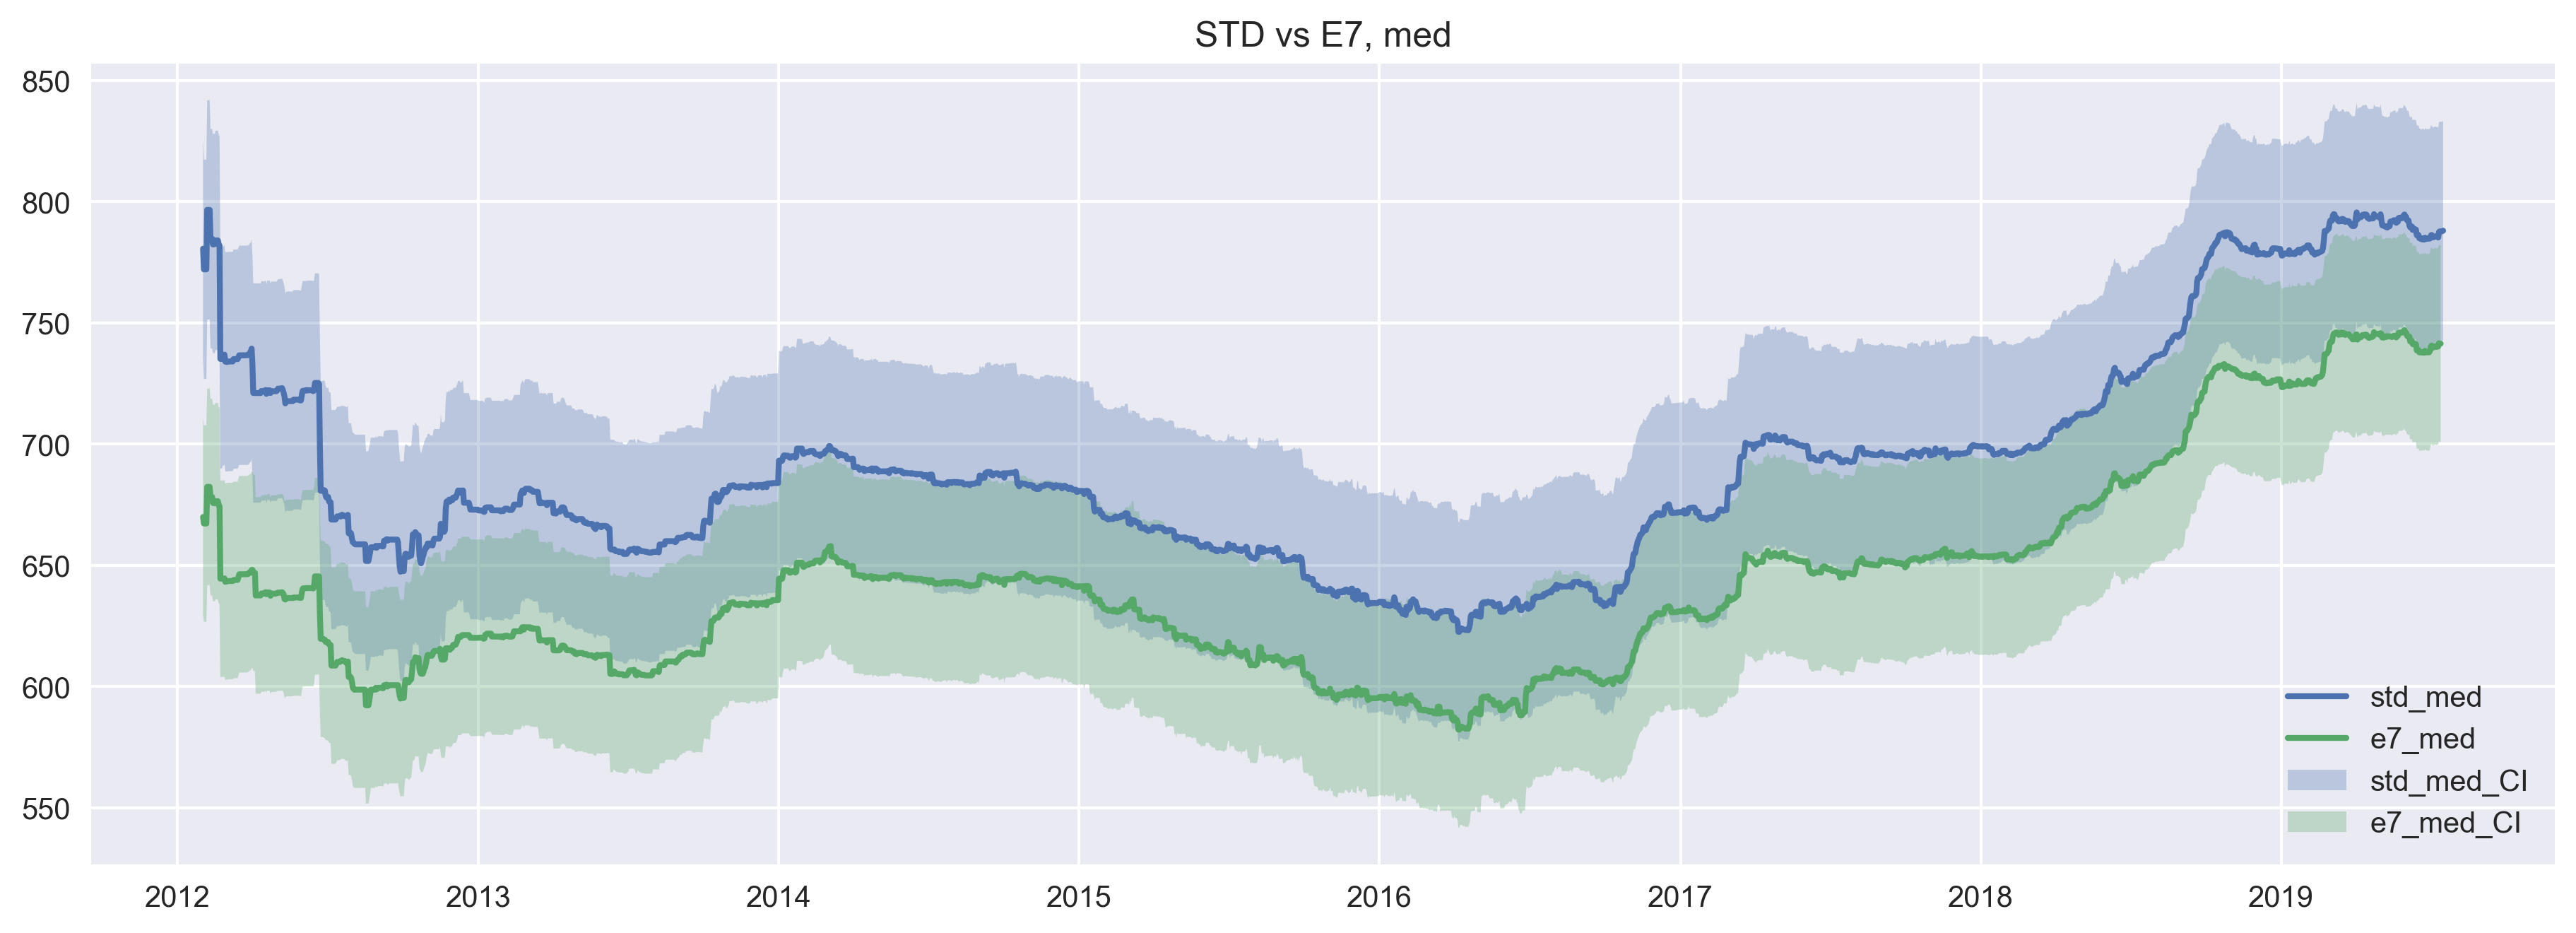

In [10]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_med['date'],std_med['cost_mean'],lw=2, alpha = 1,label='std_med')
plt.fill_between(std_med['date'], std_med['low_CI'], std_med['upper_CI'],  alpha = 0.3,label='std_med_CI')

plt.plot(e7_med['date'],e7_med['cost_mean'],lw=2, alpha = 1,label='e7_med')
plt.fill_between(e7_med['date'], e7_med['low_CI'], e7_med['upper_CI'],  alpha = 0.3,label='e7_med_CI')
plt.title('STD vs E7, med')
plt.legend(loc='best',fontsize=10)
plt.savefig('med.jpg')

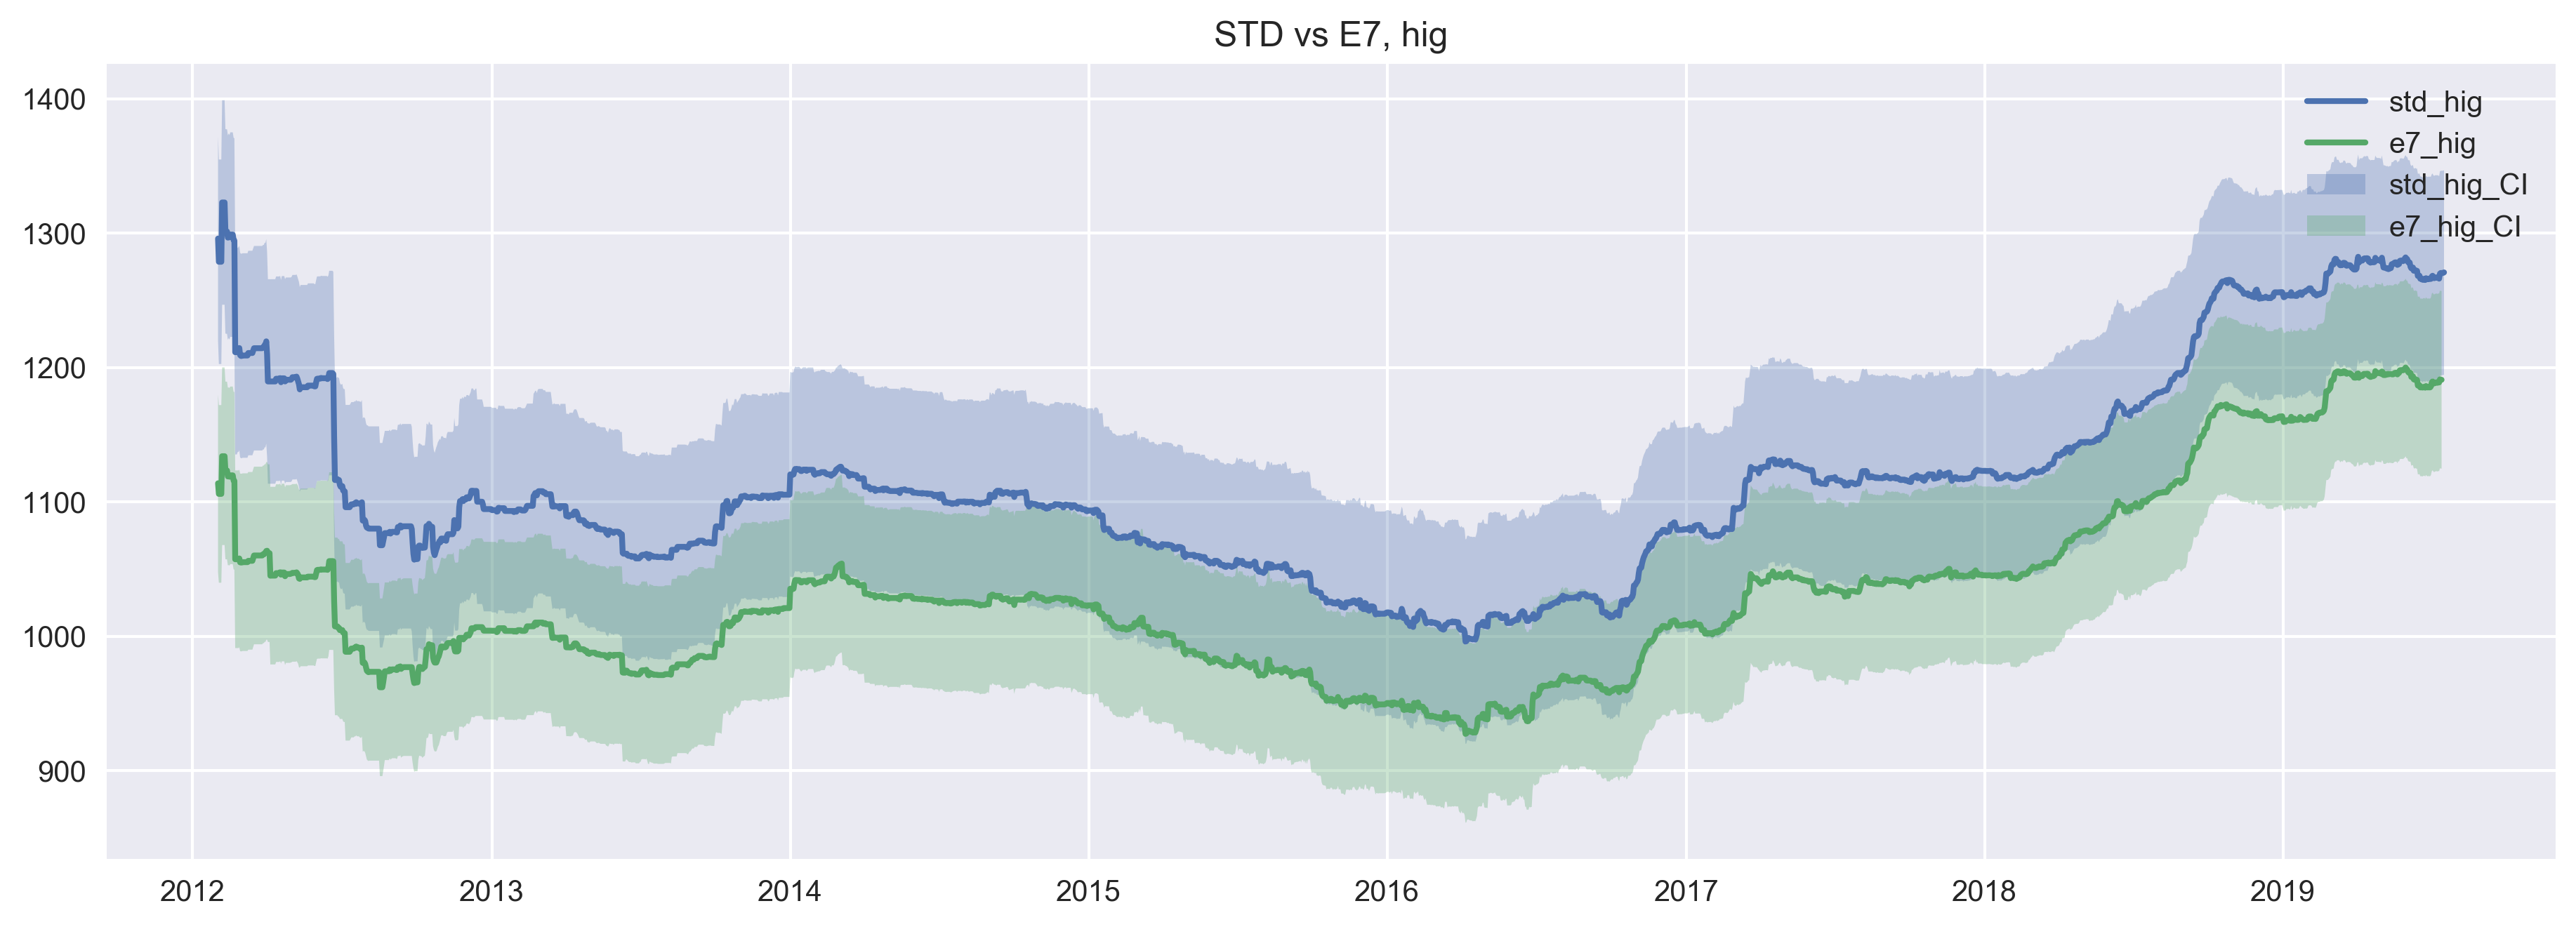

In [9]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_hig['date'],std_hig['cost_mean'],lw=2, alpha = 1,label='std_hig')
plt.fill_between(std_hig['date'], std_hig['low_CI'], std_hig['upper_CI'],  alpha = 0.3,label='std_hig_CI')

plt.plot(e7_hig['date'],e7_hig['cost_mean'],lw=2, alpha = 1,label='e7_hig')
plt.fill_between(e7_hig['date'], e7_hig['low_CI'], e7_hig['upper_CI'],  alpha = 0.3,label='e7_hig_CI')
plt.title('STD vs E7, hig')
plt.legend(loc='best',fontsize=10)
plt.savefig('hig.jpg')

# peak/off-peak split
* try different ratios to find in which conditions customers can benefit from E7 

* take 0.72/0.28 to analysis

In [12]:
time_e7_72 = pd.read_csv('time_e7_72.csv')

In [13]:
e7_low_72 = time_e7_72[time_e7_72['usage']=='low'][['date','cost_mean']].groupby('date').mean()
e7_med_72 = time_e7_72[time_e7_72['usage']=='med'][['date','cost_mean']].groupby('date').mean()
e7_hig_72 = time_e7_72[time_e7_72['usage']=='hig'][['date','cost_mean']].groupby('date').mean()

In [14]:
e7_low_72.index=pd.to_datetime(e7_low_72.index)
e7_hig_72.index=pd.to_datetime(e7_hig_72.index)
e7_med_72.index=pd.to_datetime(e7_med_72.index)

In [15]:
e7_low_72.reset_index(inplace=True)
e7_med_72.reset_index(inplace=True)
e7_hig_72.reset_index(inplace=True)

#Create confidence interval
e7_low_72['low_CI'] = e7_low_72['cost_mean'] -  np.std(e7_low_72['cost_mean'])
e7_low_72['upper_CI'] = e7_low_72['cost_mean'] + np.std(e7_low_72['cost_mean'])

e7_med_72['low_CI'] = e7_med_72['cost_mean'] -  np.std(e7_med_72['cost_mean'])
e7_med_72['upper_CI'] = e7_med_72['cost_mean'] + np.std(e7_med_72['cost_mean'])

e7_hig_72['low_CI'] = e7_hig_72['cost_mean'] -  np.std(e7_hig_72['cost_mean'])
e7_hig_72['upper_CI'] = e7_hig_72['cost_mean'] + np.std(e7_hig_72['cost_mean'])

e7_low_72 = e7_low_72[e7_low_72['date']>='20120201']
e7_med_72 = e7_med_72[e7_med_72['date']>='20120201']
e7_hig_72 = e7_hig_72[e7_hig_72['date']>='20120201']

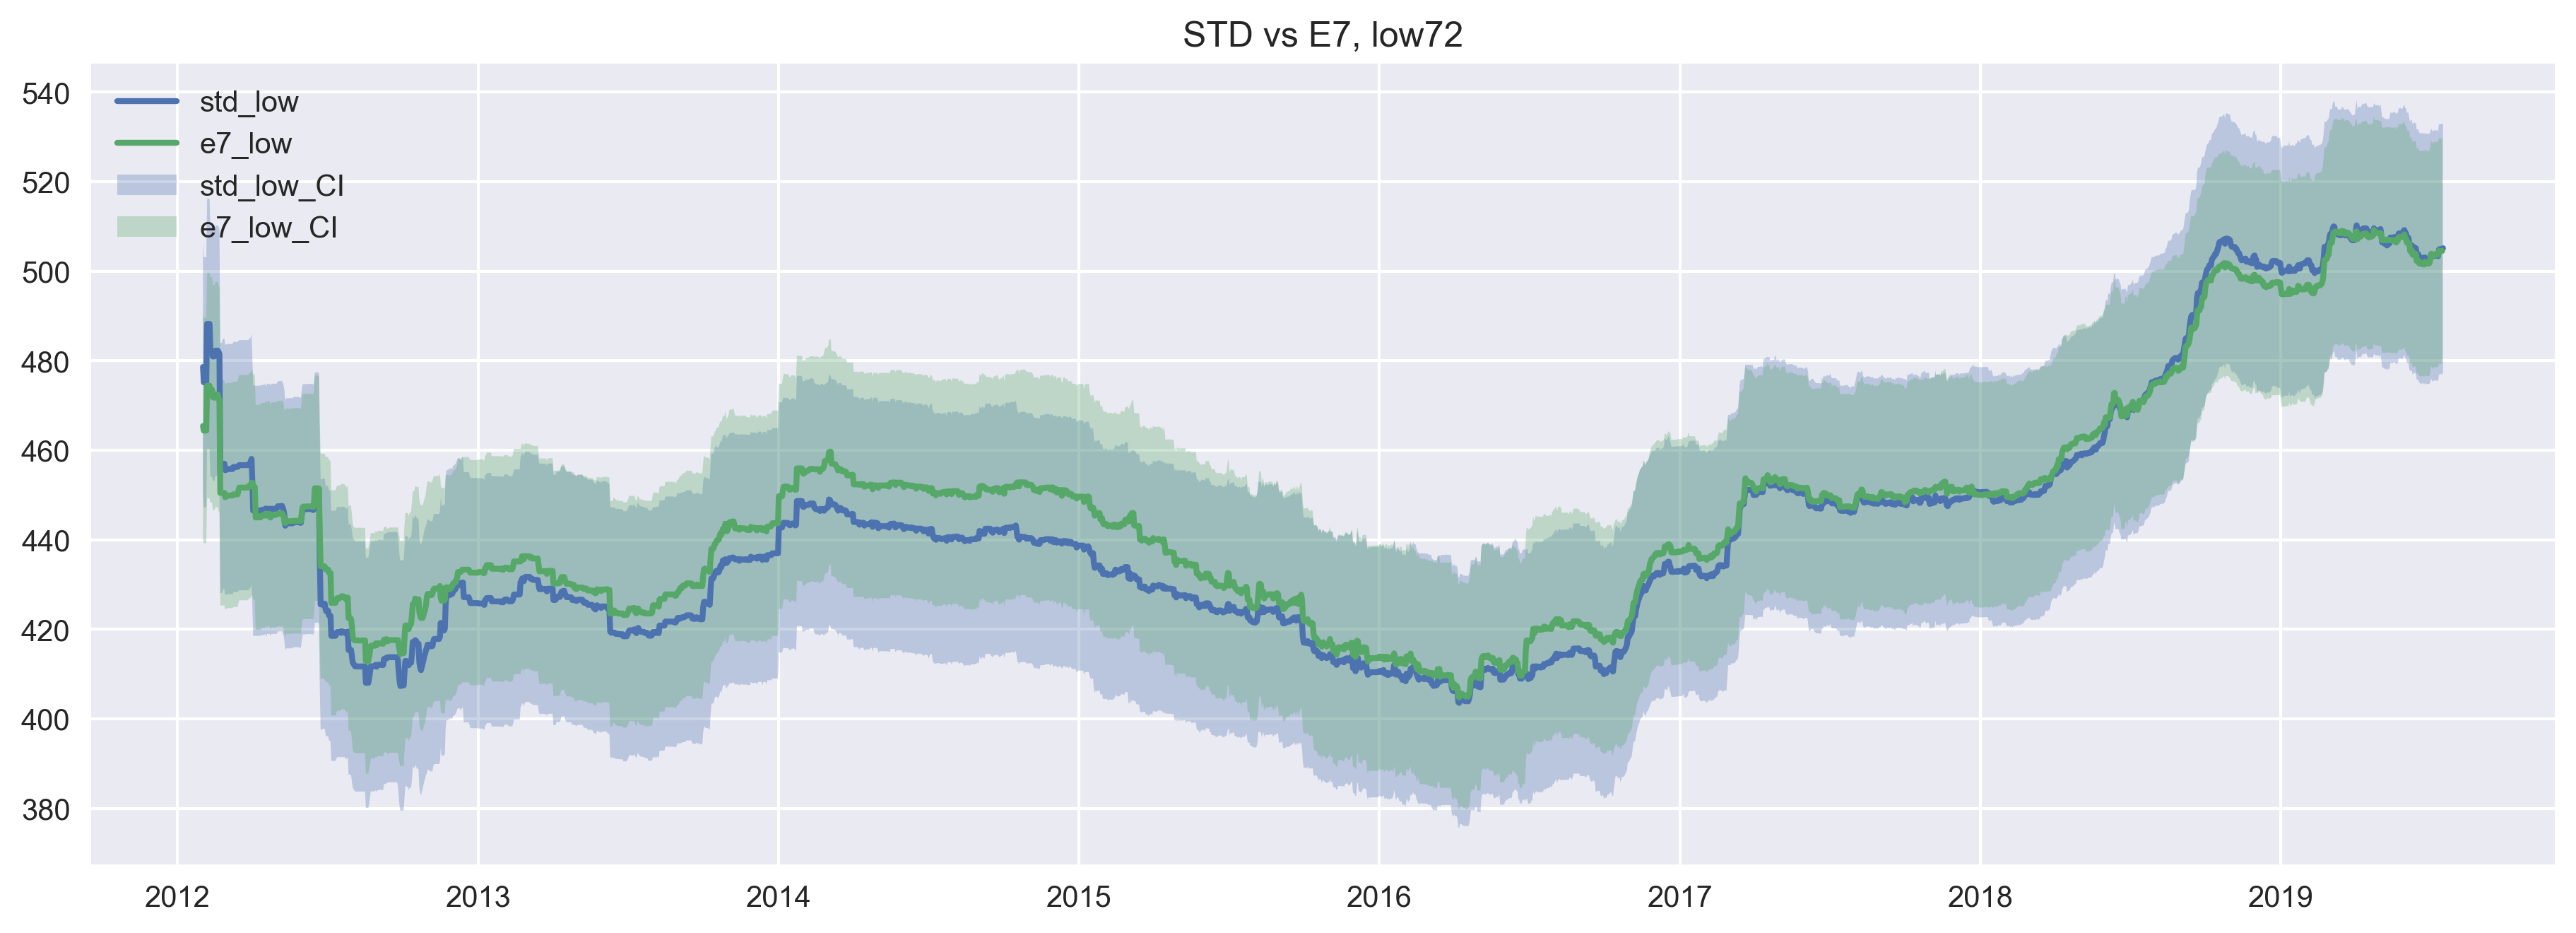

In [16]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_low['date'],std_low['cost_mean'],lw=2, alpha = 1,label='std_low')
plt.fill_between(std_low['date'], std_low['low_CI'], std_low['upper_CI'],  alpha = 0.3,label='std_low_CI')

plt.plot(e7_low_72['date'],e7_low_72['cost_mean'],lw=2, alpha = 1,label='e7_low')
plt.fill_between(e7_low_72['date'], e7_low_72['low_CI'], e7_low_72['upper_CI'],  alpha = 0.3,label='e7_low_CI')
plt.title('STD vs E7, low72')
plt.legend(loc='best',fontsize=10)
plt.savefig('low_72.jpg')

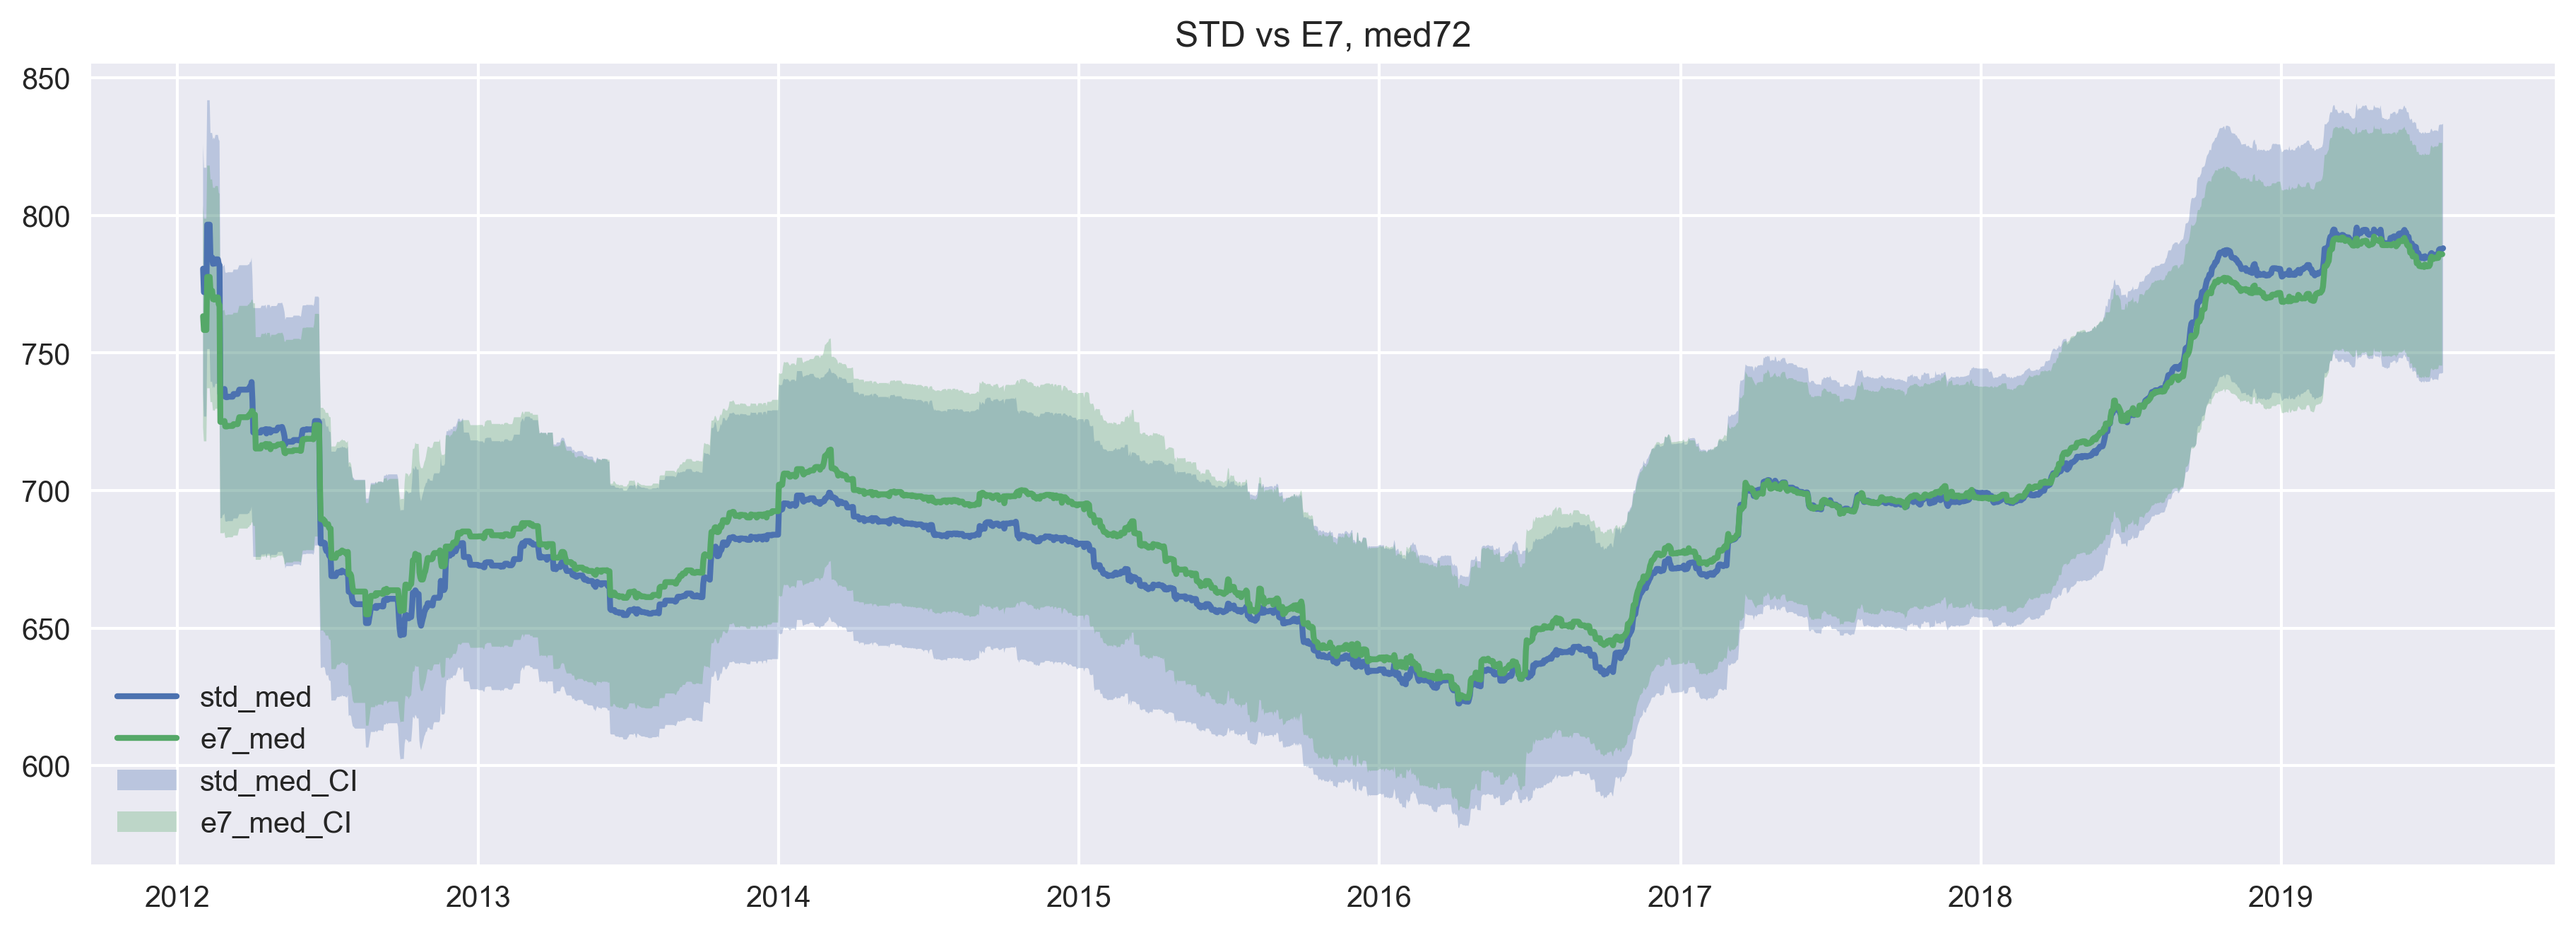

In [17]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_med['date'],std_med['cost_mean'],lw=2, alpha = 1,label='std_med')
plt.fill_between(std_med['date'], std_med['low_CI'], std_med['upper_CI'],  alpha = 0.3,label='std_med_CI')

plt.plot(e7_med_72['date'],e7_med_72['cost_mean'],lw=2, alpha = 1,label='e7_med')
plt.fill_between(e7_med_72['date'], e7_med_72['low_CI'], e7_med_72['upper_CI'],  alpha = 0.3,label='e7_med_CI')
plt.title('STD vs E7, med72')
plt.legend(loc='best',fontsize=10)
plt.savefig('med72.jpg')

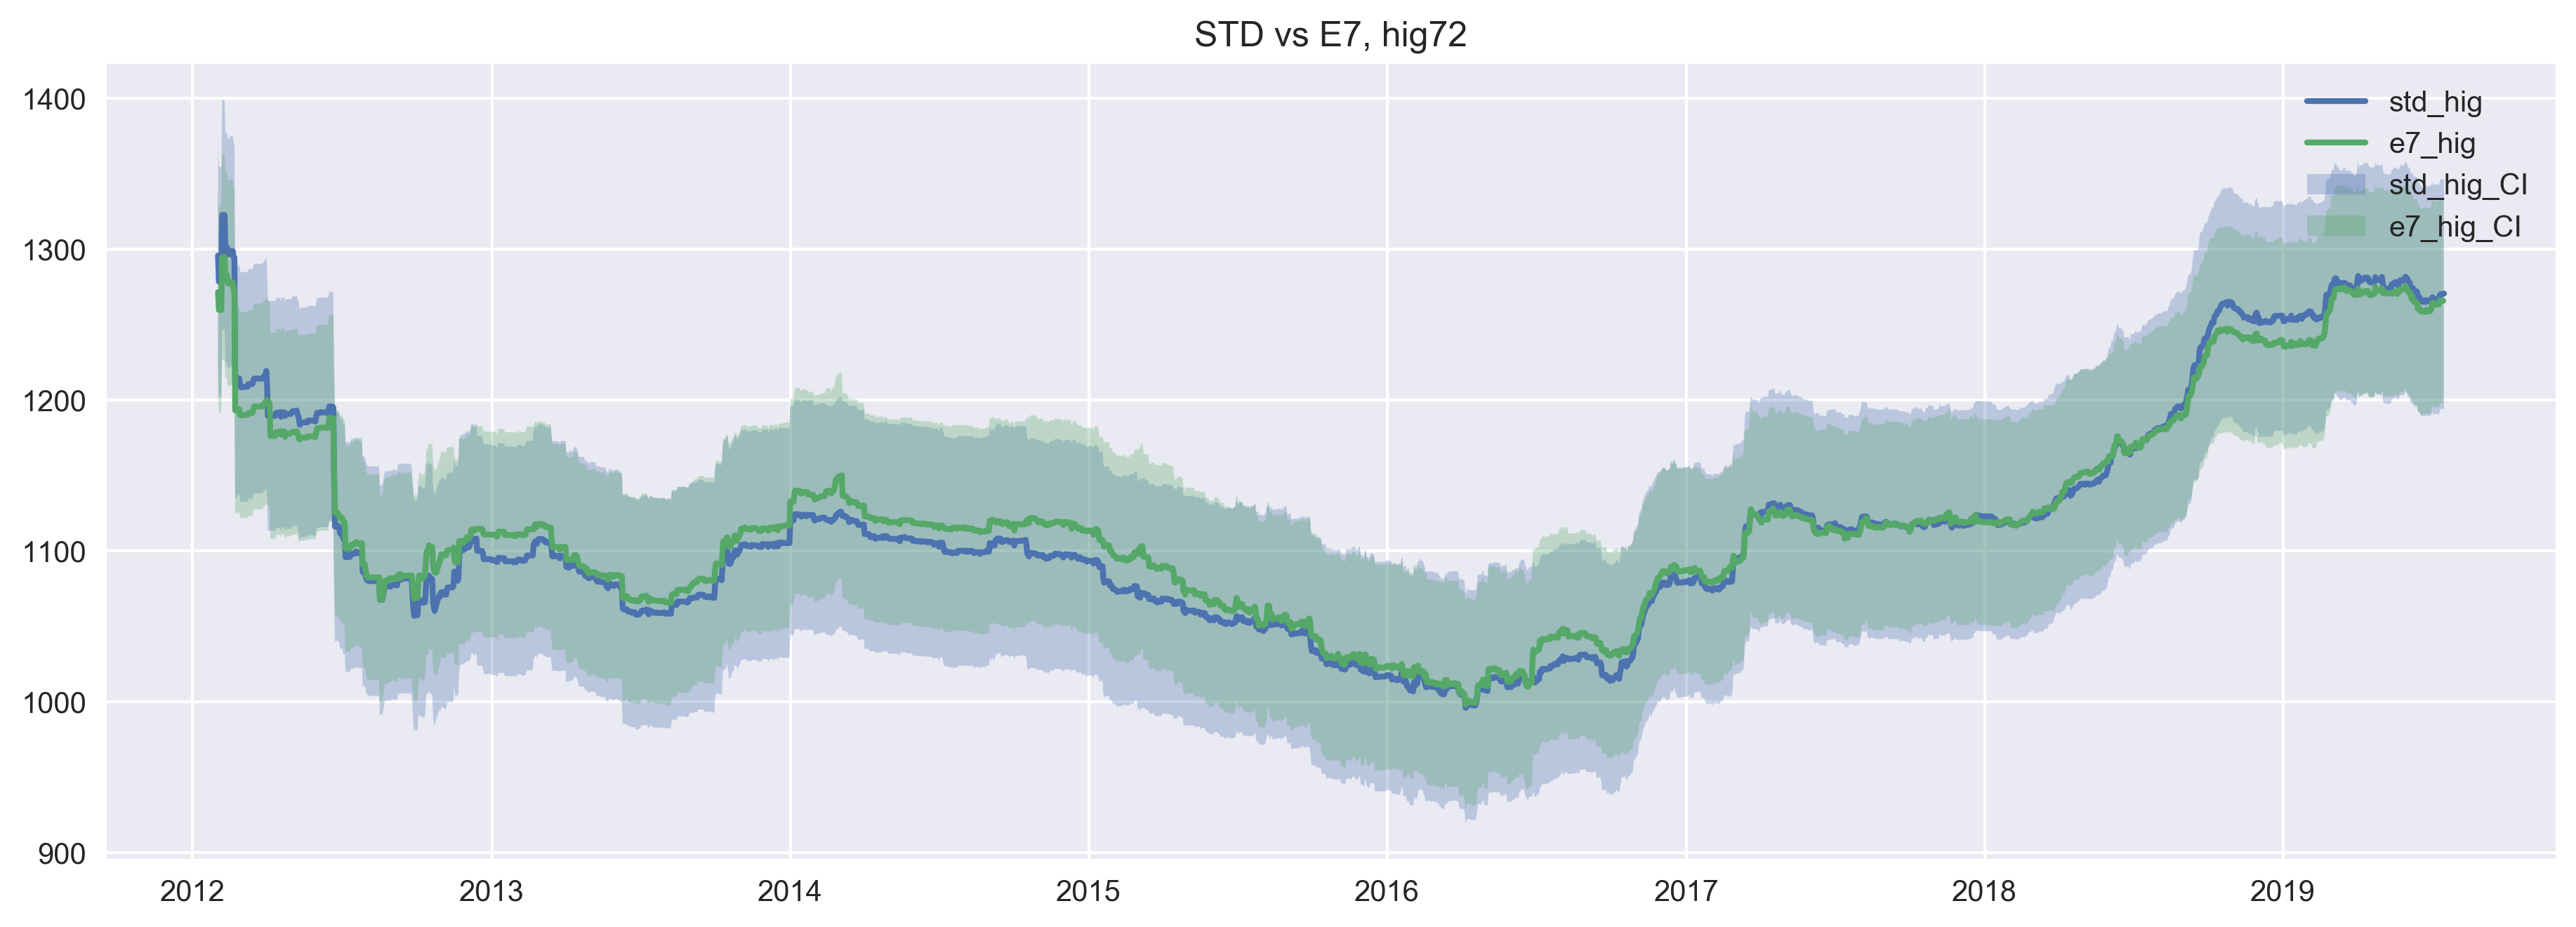

In [18]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_hig['date'],std_hig['cost_mean'],lw=2, alpha = 1,label='std_hig')
plt.fill_between(std_hig['date'], std_hig['low_CI'], std_hig['upper_CI'],  alpha = 0.3,label='std_hig_CI')

plt.plot(e7_hig_72['date'],e7_hig_72['cost_mean'],lw=2, alpha = 1,label='e7_hig')
plt.fill_between(e7_hig_72['date'], e7_hig_72['low_CI'], e7_hig_72['upper_CI'],  alpha = 0.3,label='e7_hig_CI')
plt.title('STD vs E7, hig72')
plt.legend(loc='best',fontsize=10)
plt.savefig('hig72.jpg')

0.75/0.25

In [19]:
time_e7_75 = pd.read_csv('time_e7_75.csv')

In [20]:
e7_low_75 = time_e7_75[time_e7_75['usage']=='low'][['date','cost_mean']].groupby('date').mean()
e7_med_75 = time_e7_75[time_e7_75['usage']=='med'][['date','cost_mean']].groupby('date').mean()
e7_hig_75 = time_e7_75[time_e7_75['usage']=='hig'][['date','cost_mean']].groupby('date').mean()

e7_low_75.index=pd.to_datetime(e7_low_75.index)
e7_hig_75.index=pd.to_datetime(e7_hig_75.index)
e7_med_75.index=pd.to_datetime(e7_med_75.index)

In [22]:
e7_low_75.reset_index(inplace=True)
e7_med_75.reset_index(inplace=True)
e7_hig_75.reset_index(inplace=True)

#Create confidence interval
e7_low_75['low_CI'] = e7_low_75['cost_mean'] -  np.std(e7_low_75['cost_mean'])
e7_low_75['upper_CI'] = e7_low_75['cost_mean'] + np.std(e7_low_75['cost_mean'])

e7_med_75['low_CI'] = e7_med_75['cost_mean'] -  np.std(e7_med_75['cost_mean'])
e7_med_75['upper_CI'] = e7_med_75['cost_mean'] + np.std(e7_med_75['cost_mean'])

e7_hig_75['low_CI'] = e7_hig_75['cost_mean'] -  np.std(e7_hig_75['cost_mean'])
e7_hig_75['upper_CI'] = e7_hig_75['cost_mean'] + np.std(e7_hig_75['cost_mean'])

e7_low_75 = e7_low_75[e7_low_75['date']>='20120201']
e7_med_75 = e7_med_75[e7_med_75['date']>='20120201']
e7_hig_75 = e7_hig_75[e7_hig_75['date']>='20120201']

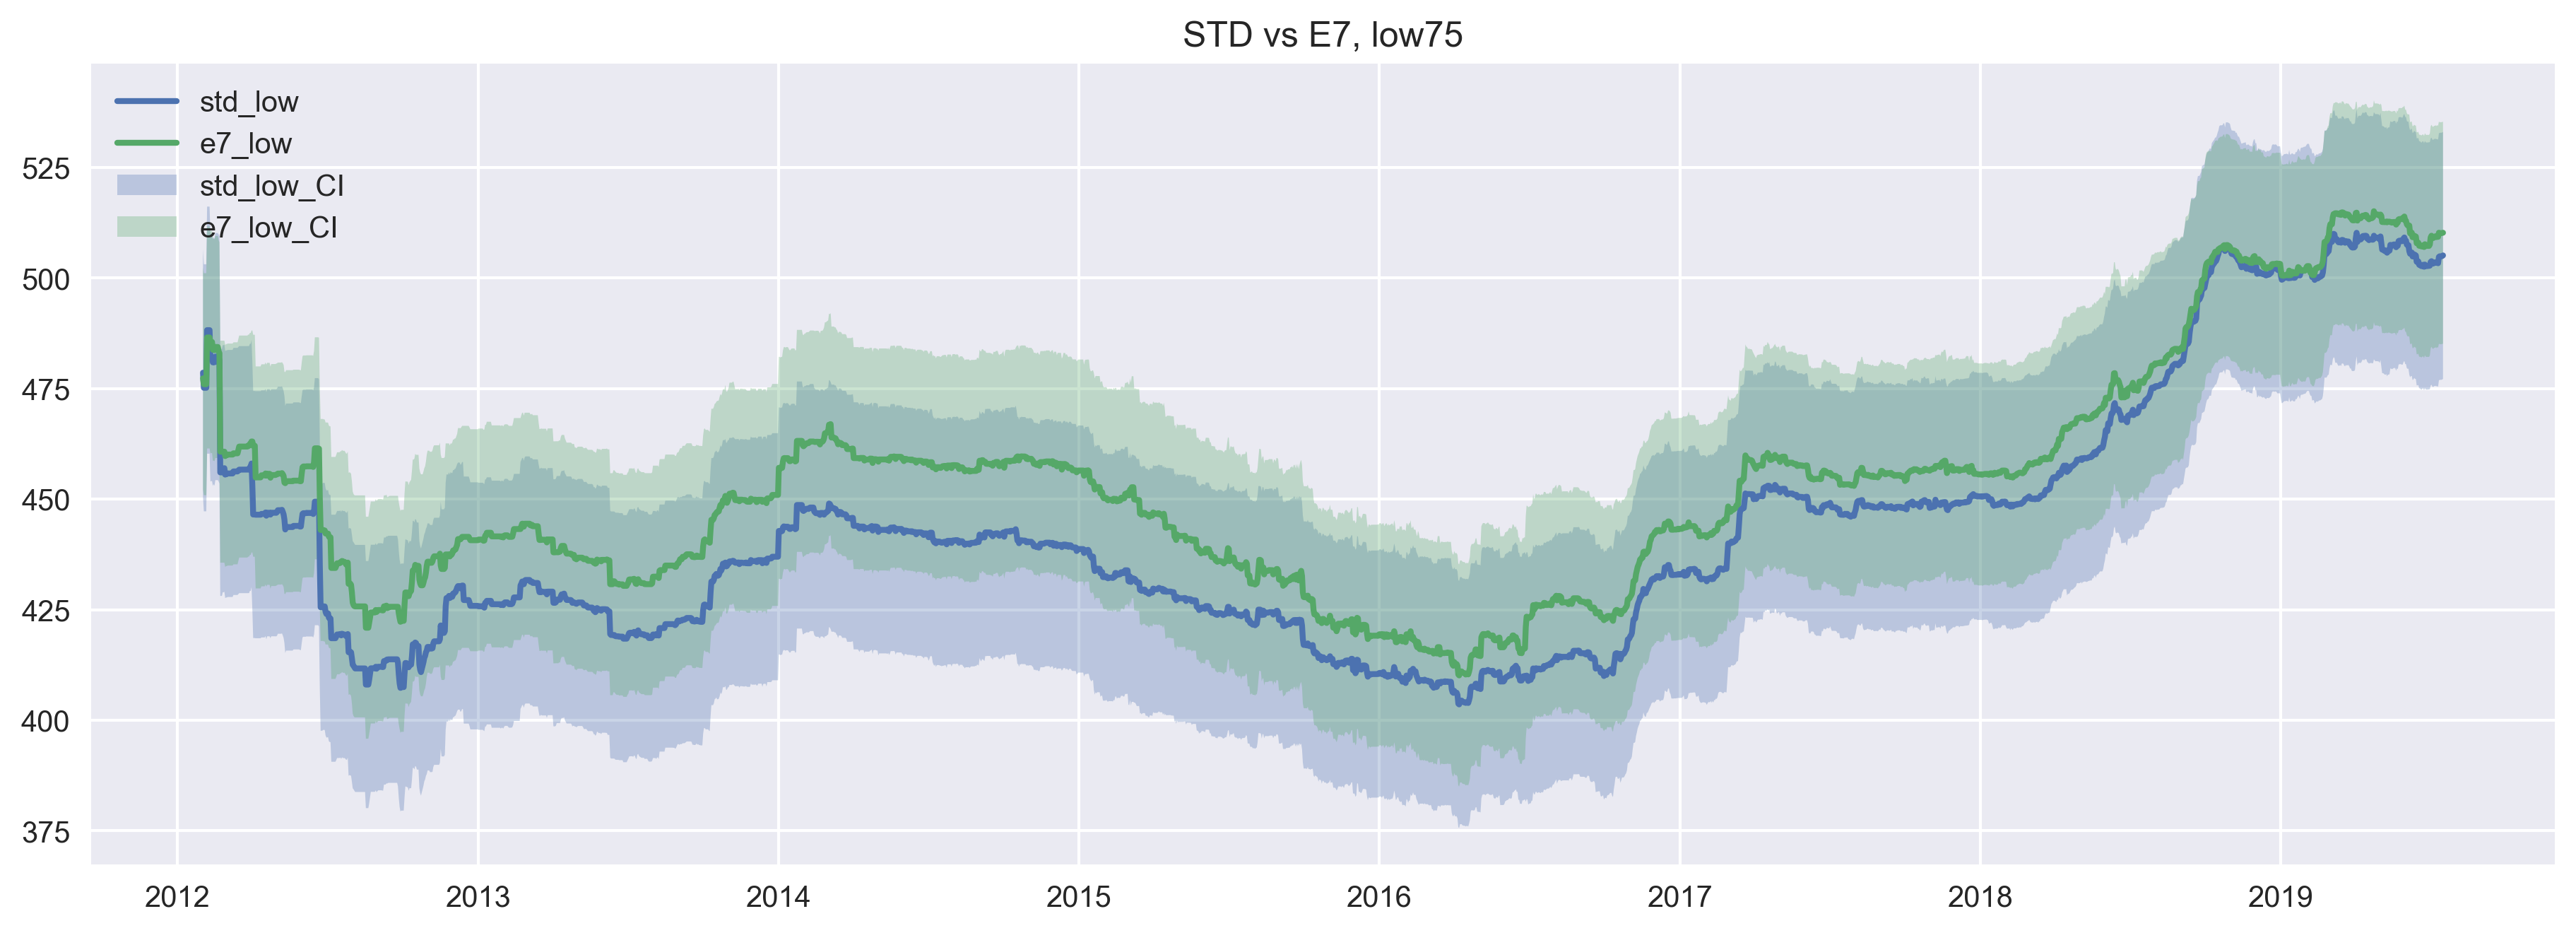

In [23]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_low['date'],std_low['cost_mean'],lw=2, alpha = 1,label='std_low')
plt.fill_between(std_low['date'], std_low['low_CI'], std_low['upper_CI'],  alpha = 0.3,label='std_low_CI')

plt.plot(e7_low_75['date'],e7_low_75['cost_mean'],lw=2, alpha = 1,label='e7_low')
plt.fill_between(e7_low_75['date'], e7_low_75['low_CI'], e7_low_75['upper_CI'],  alpha = 0.3,label='e7_low_CI')
plt.title('STD vs E7, low75')
plt.legend(loc='best',fontsize=10)
plt.savefig('low_75.jpg')

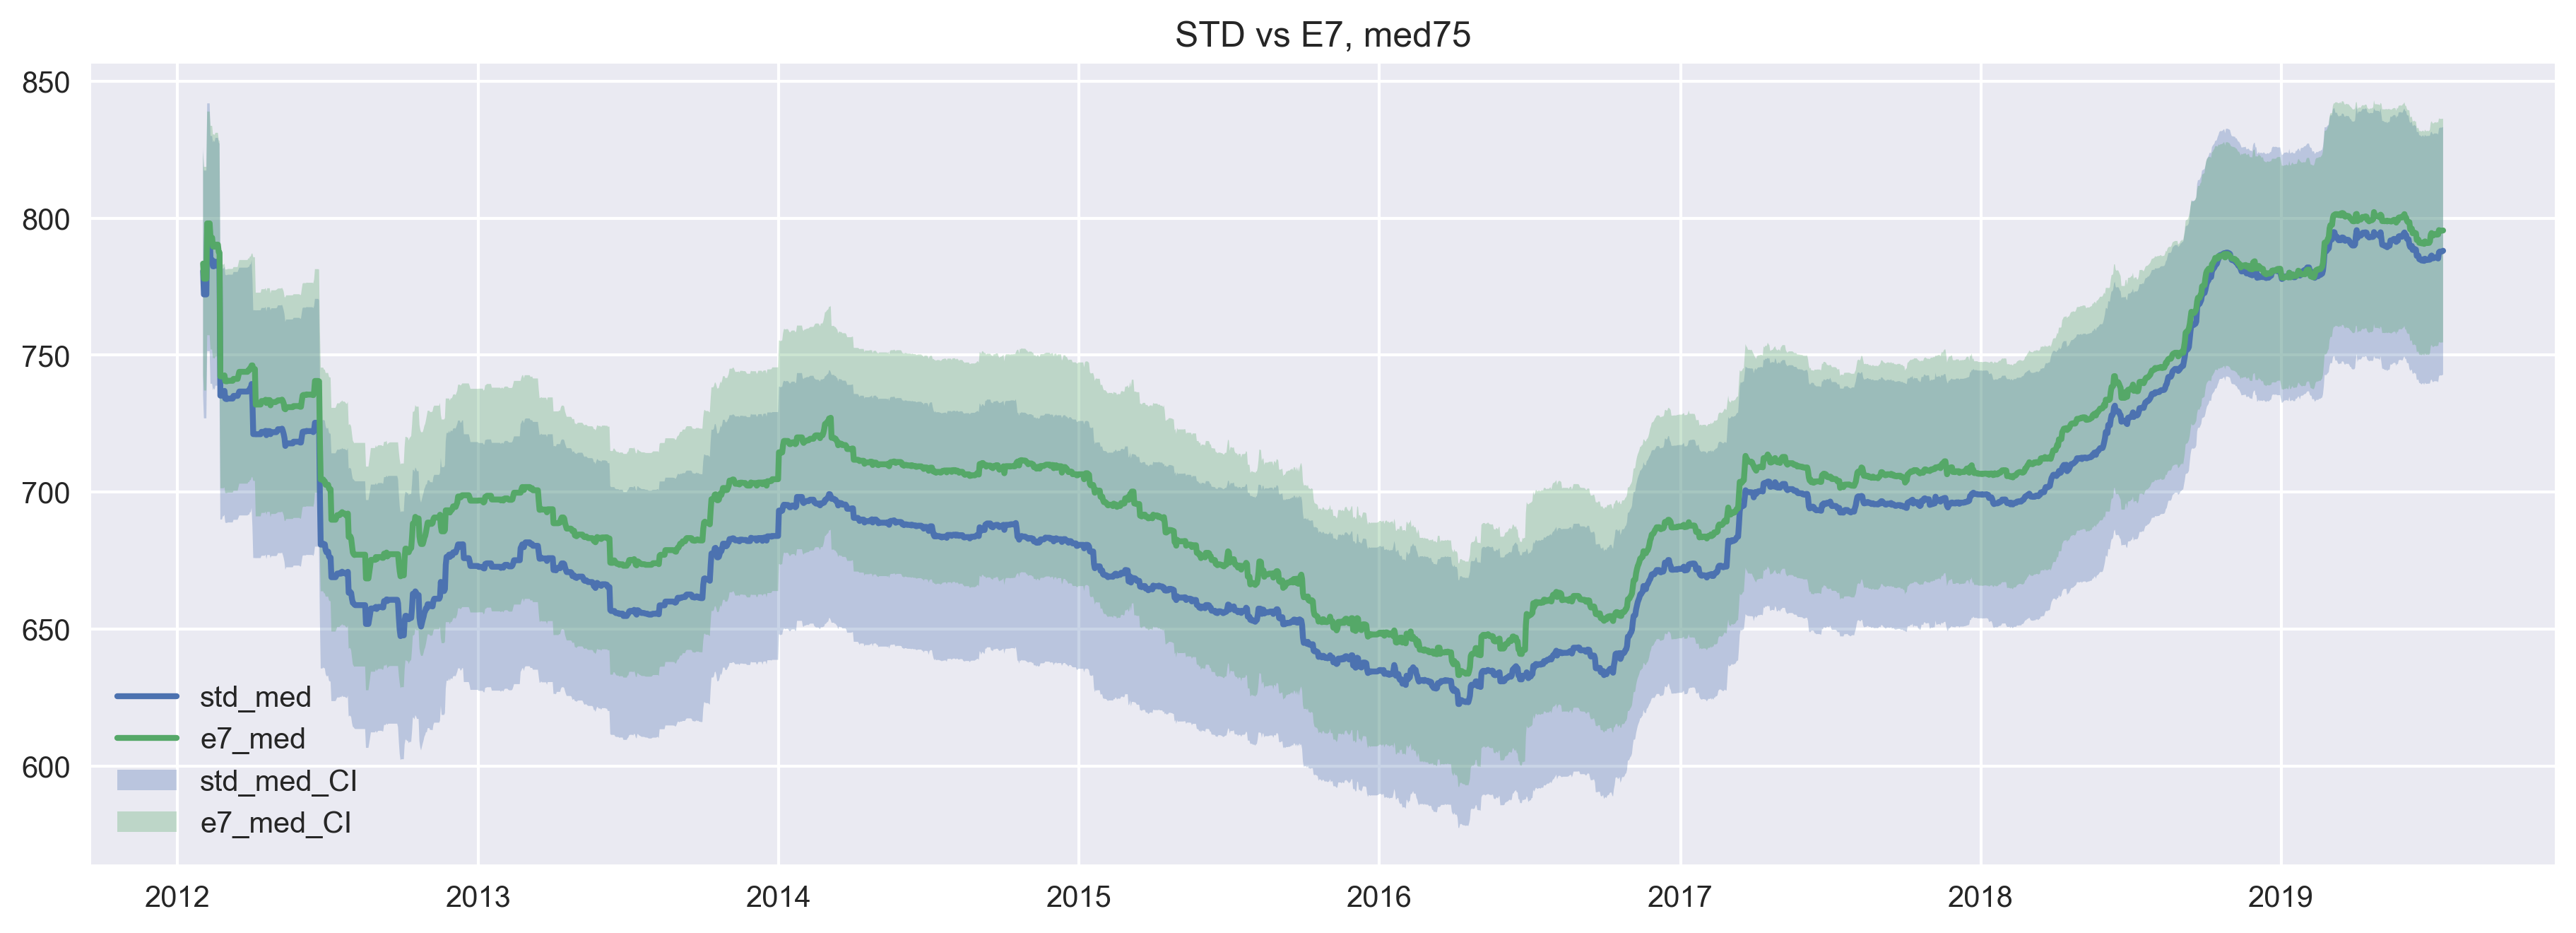

In [25]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_med['date'],std_med['cost_mean'],lw=2, alpha = 1,label='std_med')
plt.fill_between(std_med['date'], std_med['low_CI'], std_med['upper_CI'],  alpha = 0.3,label='std_med_CI')

plt.plot(e7_med_75['date'],e7_med_75['cost_mean'],lw=2, alpha = 1,label='e7_med')
plt.fill_between(e7_med_75['date'], e7_med_75['low_CI'], e7_med_75['upper_CI'],  alpha = 0.3,label='e7_med_CI')
plt.title('STD vs E7, med75')
plt.legend(loc='best',fontsize=10)
plt.savefig('med75.jpg')

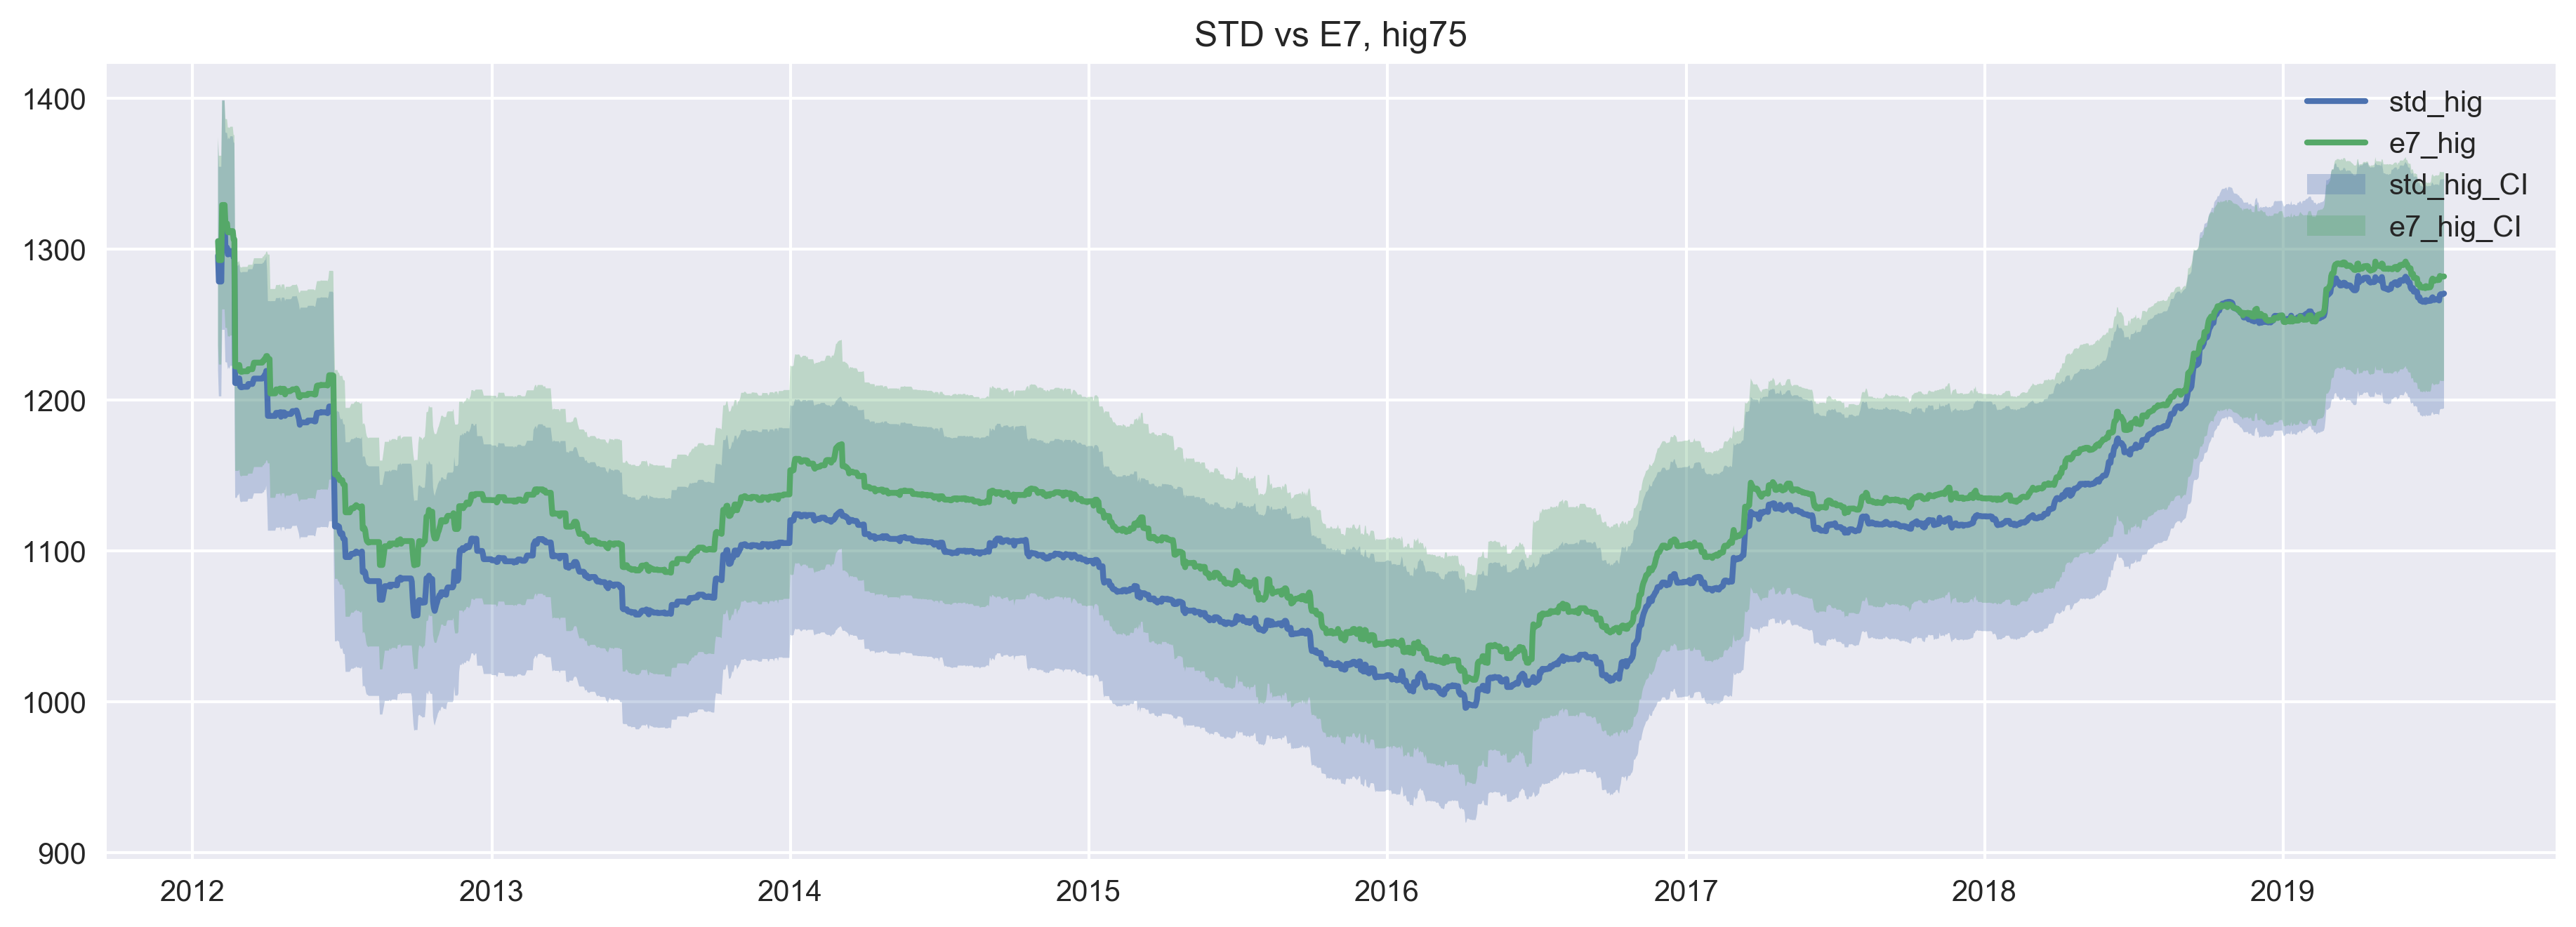

In [26]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_hig['date'],std_hig['cost_mean'],lw=2, alpha = 1,label='std_hig')
plt.fill_between(std_hig['date'], std_hig['low_CI'], std_hig['upper_CI'],  alpha = 0.3,label='std_hig_CI')

plt.plot(e7_hig_75['date'],e7_hig_75['cost_mean'],lw=2, alpha = 1,label='e7_hig')
plt.fill_between(e7_hig_75['date'], e7_hig_75['low_CI'], e7_hig_75['upper_CI'],  alpha = 0.3,label='e7_hig_CI')
plt.title('STD vs E7, hig75')
plt.legend(loc='best',fontsize=10)
plt.savefig('hig75.jpg')

0.8/0.2

In [27]:
time_e7_80 = pd.read_csv('time_e7_80.csv')
e7_low_80 = time_e7_80[time_e7_80['usage']=='low'][['date','cost_mean']].groupby('date').mean()
e7_med_80 = time_e7_80[time_e7_80['usage']=='med'][['date','cost_mean']].groupby('date').mean()
e7_hig_80 = time_e7_80[time_e7_80['usage']=='hig'][['date','cost_mean']].groupby('date').mean()

In [28]:
e7_low_80.index=pd.to_datetime(e7_low_80.index)
e7_hig_80.index=pd.to_datetime(e7_hig_80.index)
e7_med_80.index=pd.to_datetime(e7_med_80.index)

In [29]:
e7_low_80.reset_index(inplace=True)
e7_med_80.reset_index(inplace=True)
e7_hig_80.reset_index(inplace=True)

#Create confidence interval
e7_low_80['low_CI'] = e7_low_80['cost_mean'] -  np.std(e7_low_80['cost_mean'])
e7_low_80['upper_CI'] = e7_low_80['cost_mean'] + np.std(e7_low_80['cost_mean'])

e7_med_80['low_CI'] = e7_med_80['cost_mean'] -  np.std(e7_med_80['cost_mean'])
e7_med_80['upper_CI'] = e7_med_80['cost_mean'] + np.std(e7_med_80['cost_mean'])

e7_hig_80['low_CI'] = e7_hig_80['cost_mean'] -  np.std(e7_hig_80['cost_mean'])
e7_hig_80['upper_CI'] = e7_hig_80['cost_mean'] + np.std(e7_hig_80['cost_mean'])

e7_low_80 = e7_low_80[e7_low_80['date']>='20120201']
e7_med_80 = e7_med_80[e7_med_80['date']>='20120201']
e7_hig_80 = e7_hig_80[e7_hig_80['date']>='20120201']

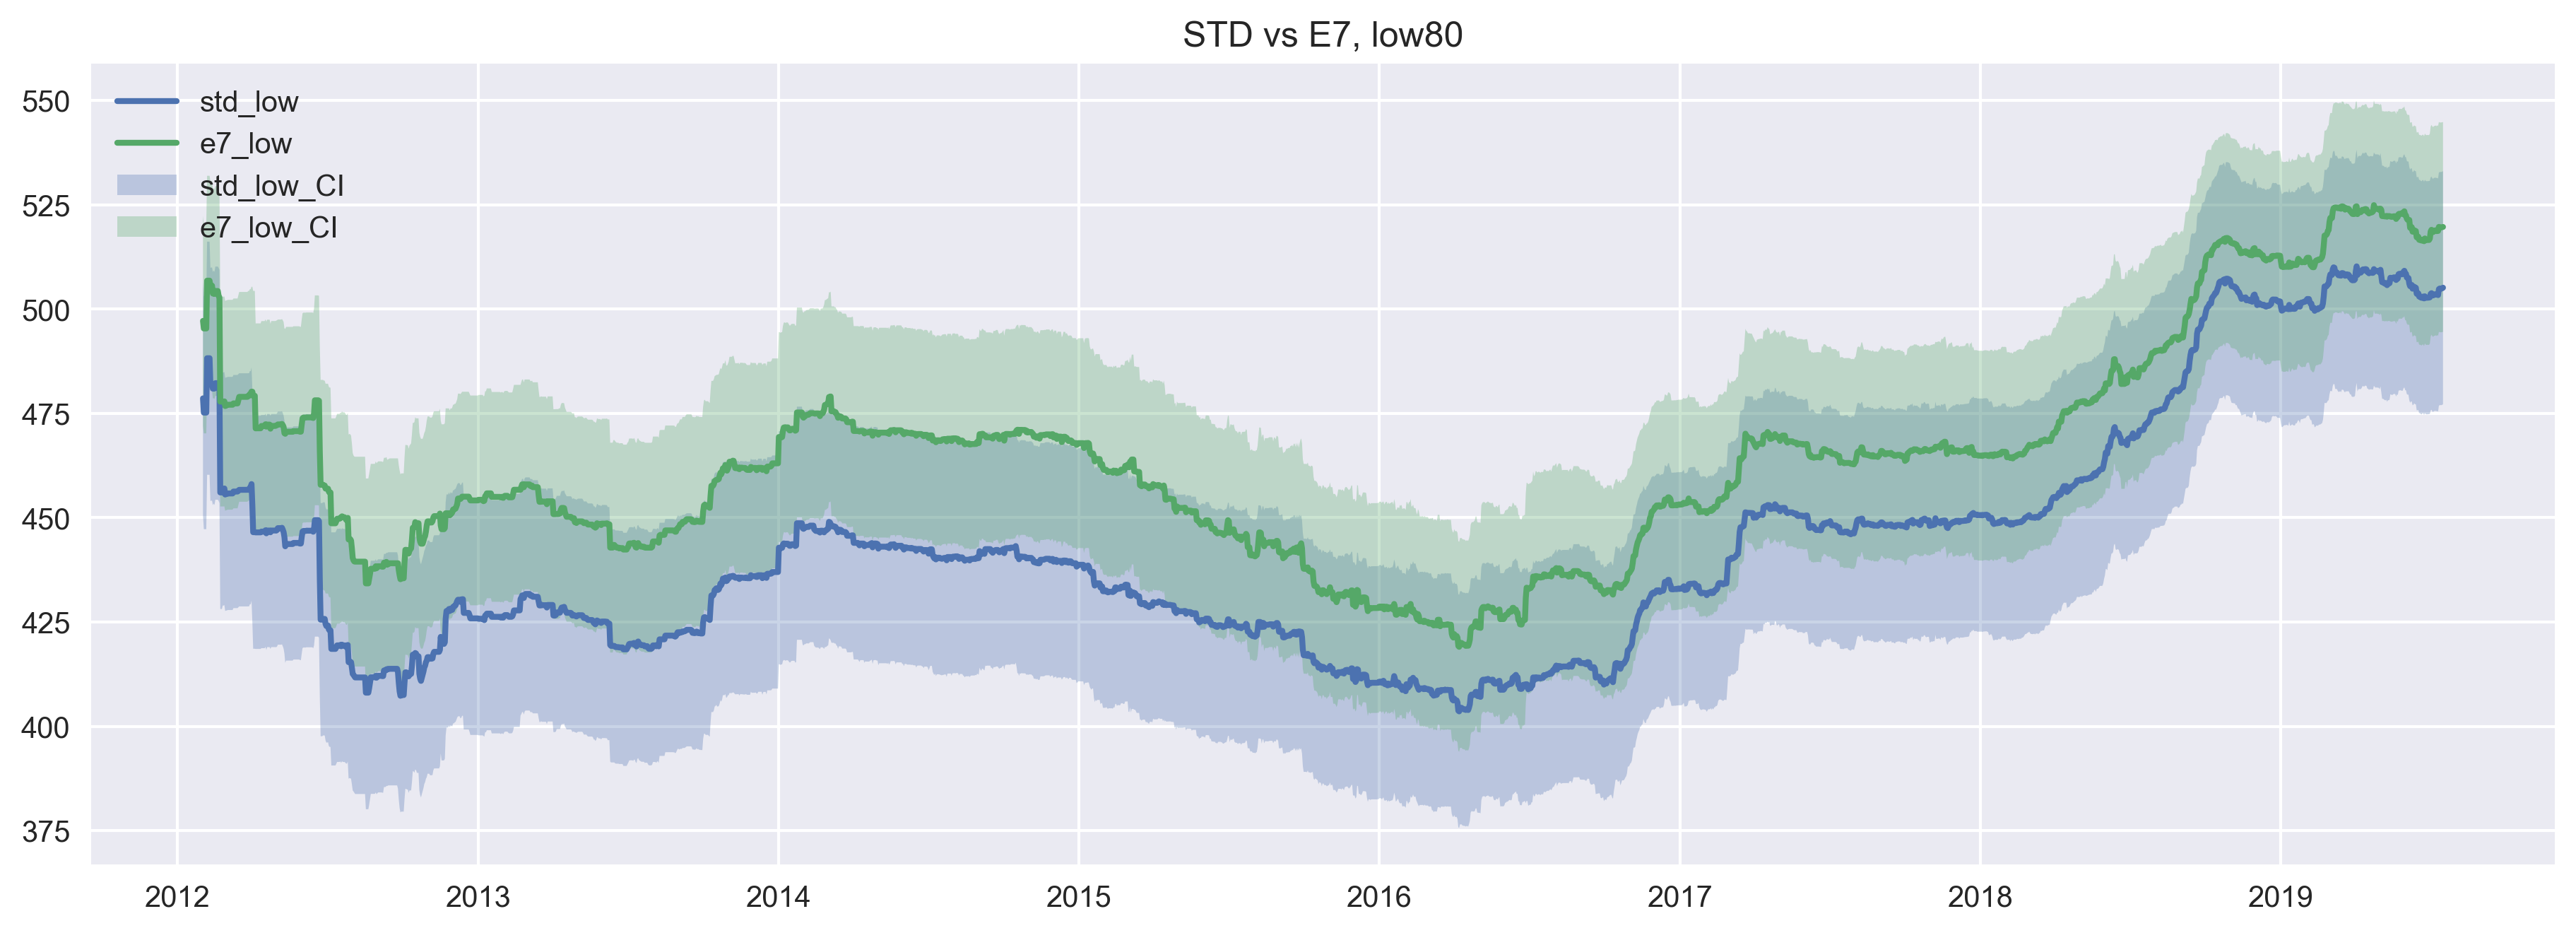

In [30]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_low['date'],std_low['cost_mean'],lw=2, alpha = 1,label='std_low')
plt.fill_between(std_low['date'], std_low['low_CI'], std_low['upper_CI'],  alpha = 0.3,label='std_low_CI')

plt.plot(e7_low_80['date'],e7_low_80['cost_mean'],lw=2, alpha = 1,label='e7_low')
plt.fill_between(e7_low_80['date'], e7_low_80['low_CI'], e7_low_80['upper_CI'],  alpha = 0.3,label='e7_low_CI')
plt.title('STD vs E7, low80')
plt.legend(loc='best',fontsize=10)
plt.savefig('low_80.jpg')

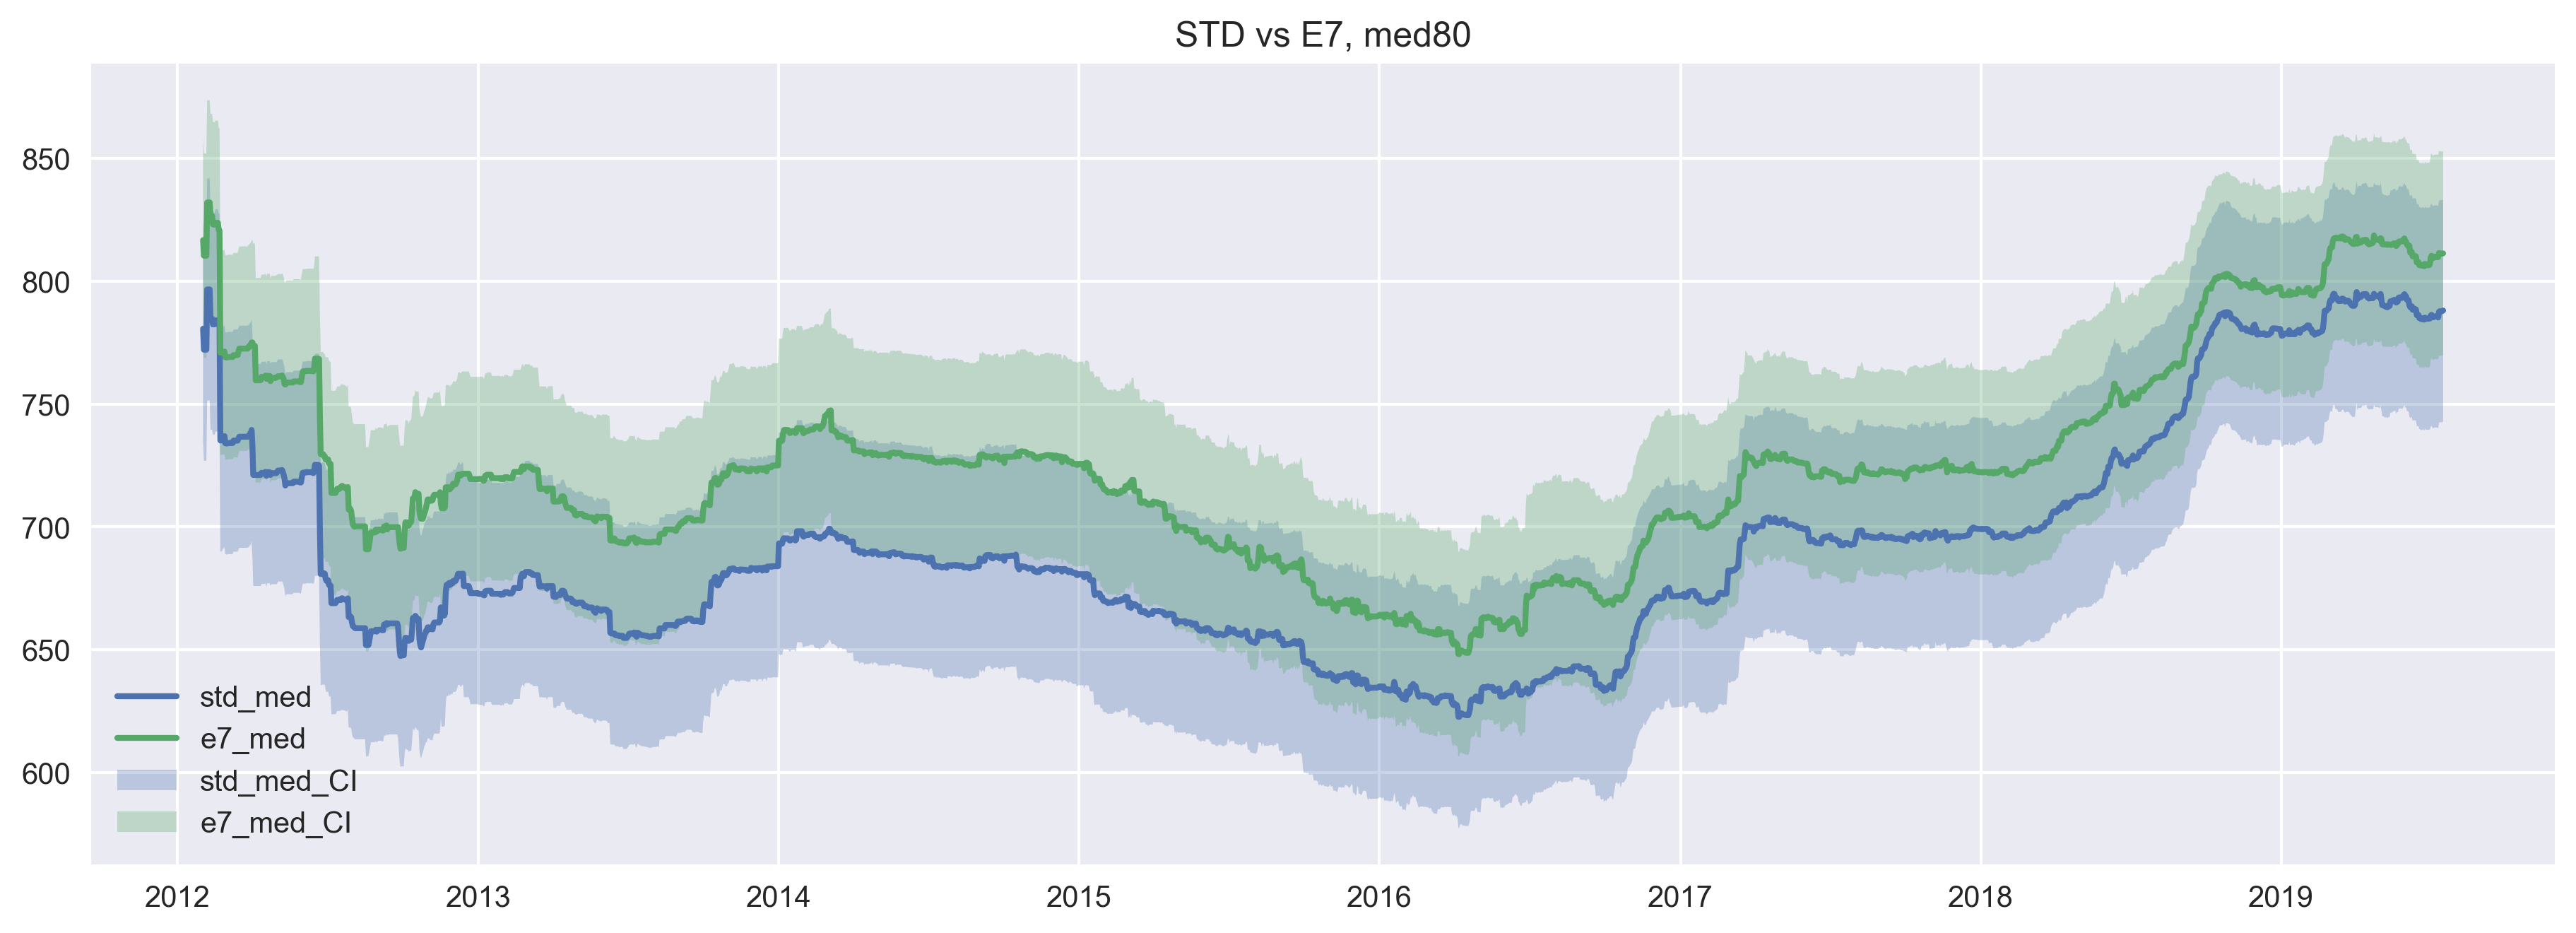

In [32]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_med['date'],std_med['cost_mean'],lw=2, alpha = 1,label='std_med')
plt.fill_between(std_med['date'], std_med['low_CI'], std_med['upper_CI'],  alpha = 0.3,label='std_med_CI')

plt.plot(e7_med_80['date'],e7_med_80['cost_mean'],lw=2, alpha = 1,label='e7_med')
plt.fill_between(e7_med_80['date'], e7_med_80['low_CI'], e7_med_80['upper_CI'],  alpha = 0.3,label='e7_med_CI')
plt.title('STD vs E7, med80')
plt.legend(loc='best',fontsize=10)
plt.savefig('med80.jpg')

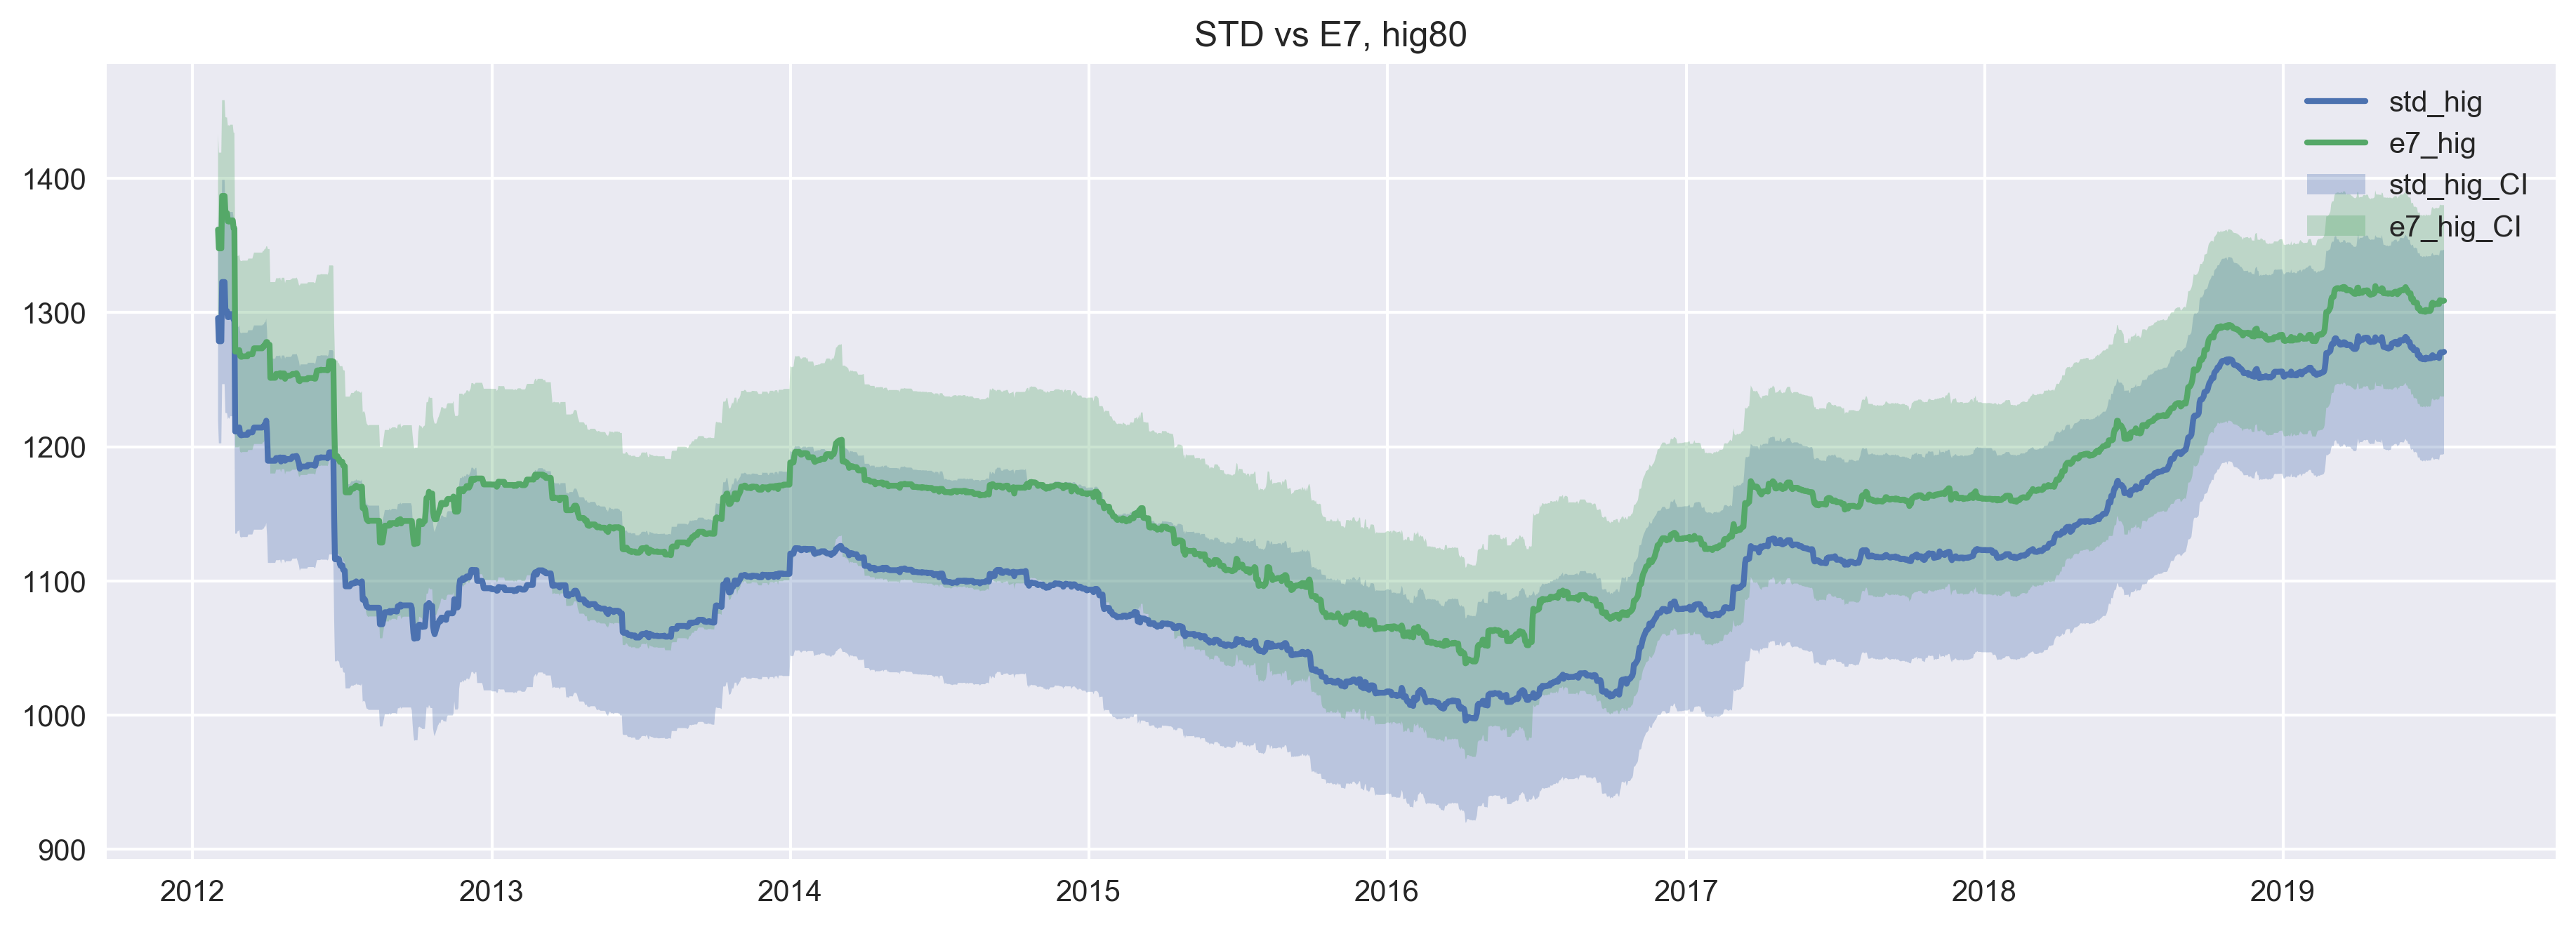

In [34]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(std_hig['date'],std_hig['cost_mean'],lw=2, alpha = 1,label='std_hig')
plt.fill_between(std_hig['date'], std_hig['low_CI'], std_hig['upper_CI'],  alpha = 0.3,label='std_hig_CI')

plt.plot(e7_hig_80['date'],e7_hig_80['cost_mean'],lw=2, alpha = 1,label='e7_hig')
plt.fill_between(e7_hig_80['date'], e7_hig_80['low_CI'], e7_hig_80['upper_CI'],  alpha = 0.3,label='e7_hig_CI')
plt.title('STD vs E7, hig80')
plt.legend(loc='best',fontsize=10)
plt.savefig('hig80.jpg')

# Comparation for the future price

training set and testing set to test which model is better 

choose the arima to make forecast

## Arima models

In [49]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.rcParams['savefig.dpi'] = 500 
plt.rcParams['figure.dpi'] = 500

style.use('seaborn')
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [69]:
std_train = std_med.copy()
std_train = std_train[['date','cost_mean']]
std_train.index = std_train.date

del std_train['date']

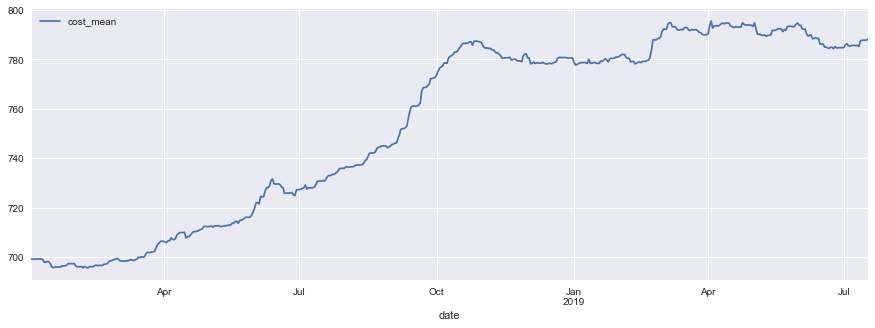

In [70]:
# choose the data from '20180101' to make predictions
std_train = std_train[std_train.index>'20180101']
std_train.plot(figsize=(15,5))

Text(0.5, 1.0, 'residual')

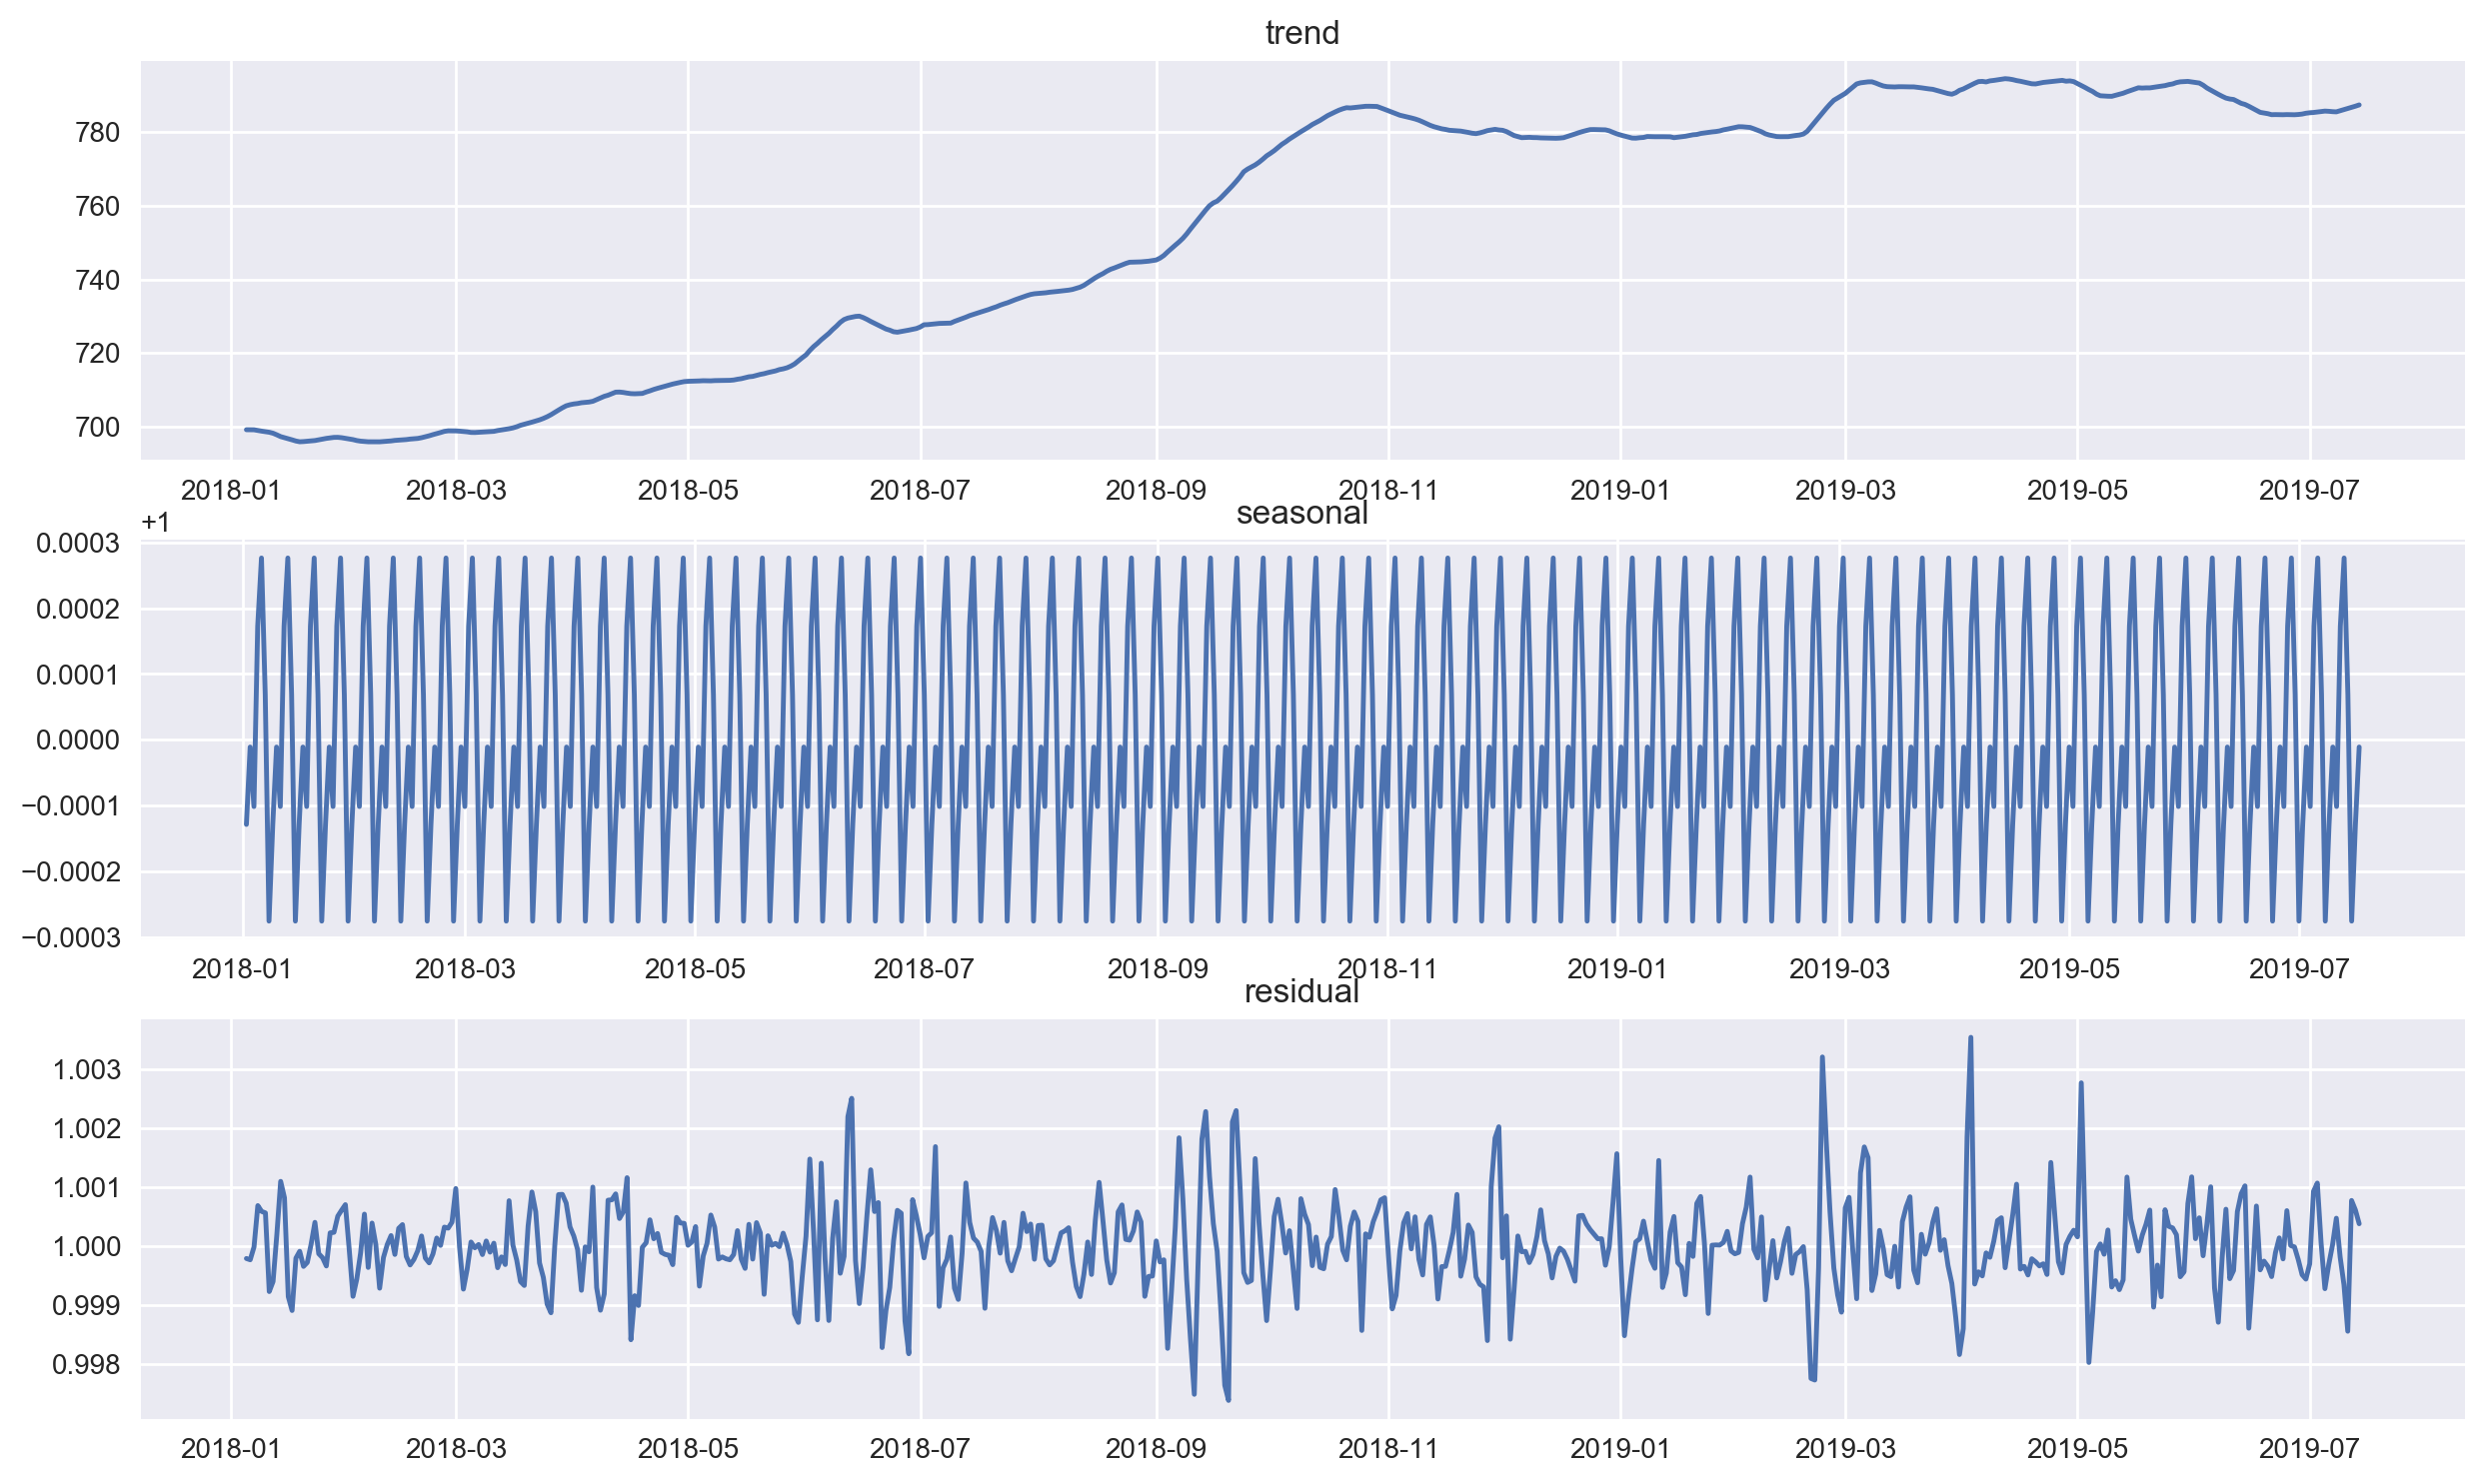

In [71]:
# decomposition
decomposition =seasonal_decompose(std_train,model='mul')
std_train.trend = decomposition.trend
std_train.seasonal = decomposition.seasonal
std_train.residual = decomposition.resid

plt.figure(figsize=(15,9),dpi=200)
plt.subplot(311)
plt.plot(std_train.trend)
plt.title('trend')
plt.subplot(312)
plt.plot(std_train.seasonal)
plt.title('seasonal')
plt.subplot(313)
plt.plot(std_train.residual)
plt.title('residual')

Text(0.5, 1.0, 'first order diff')

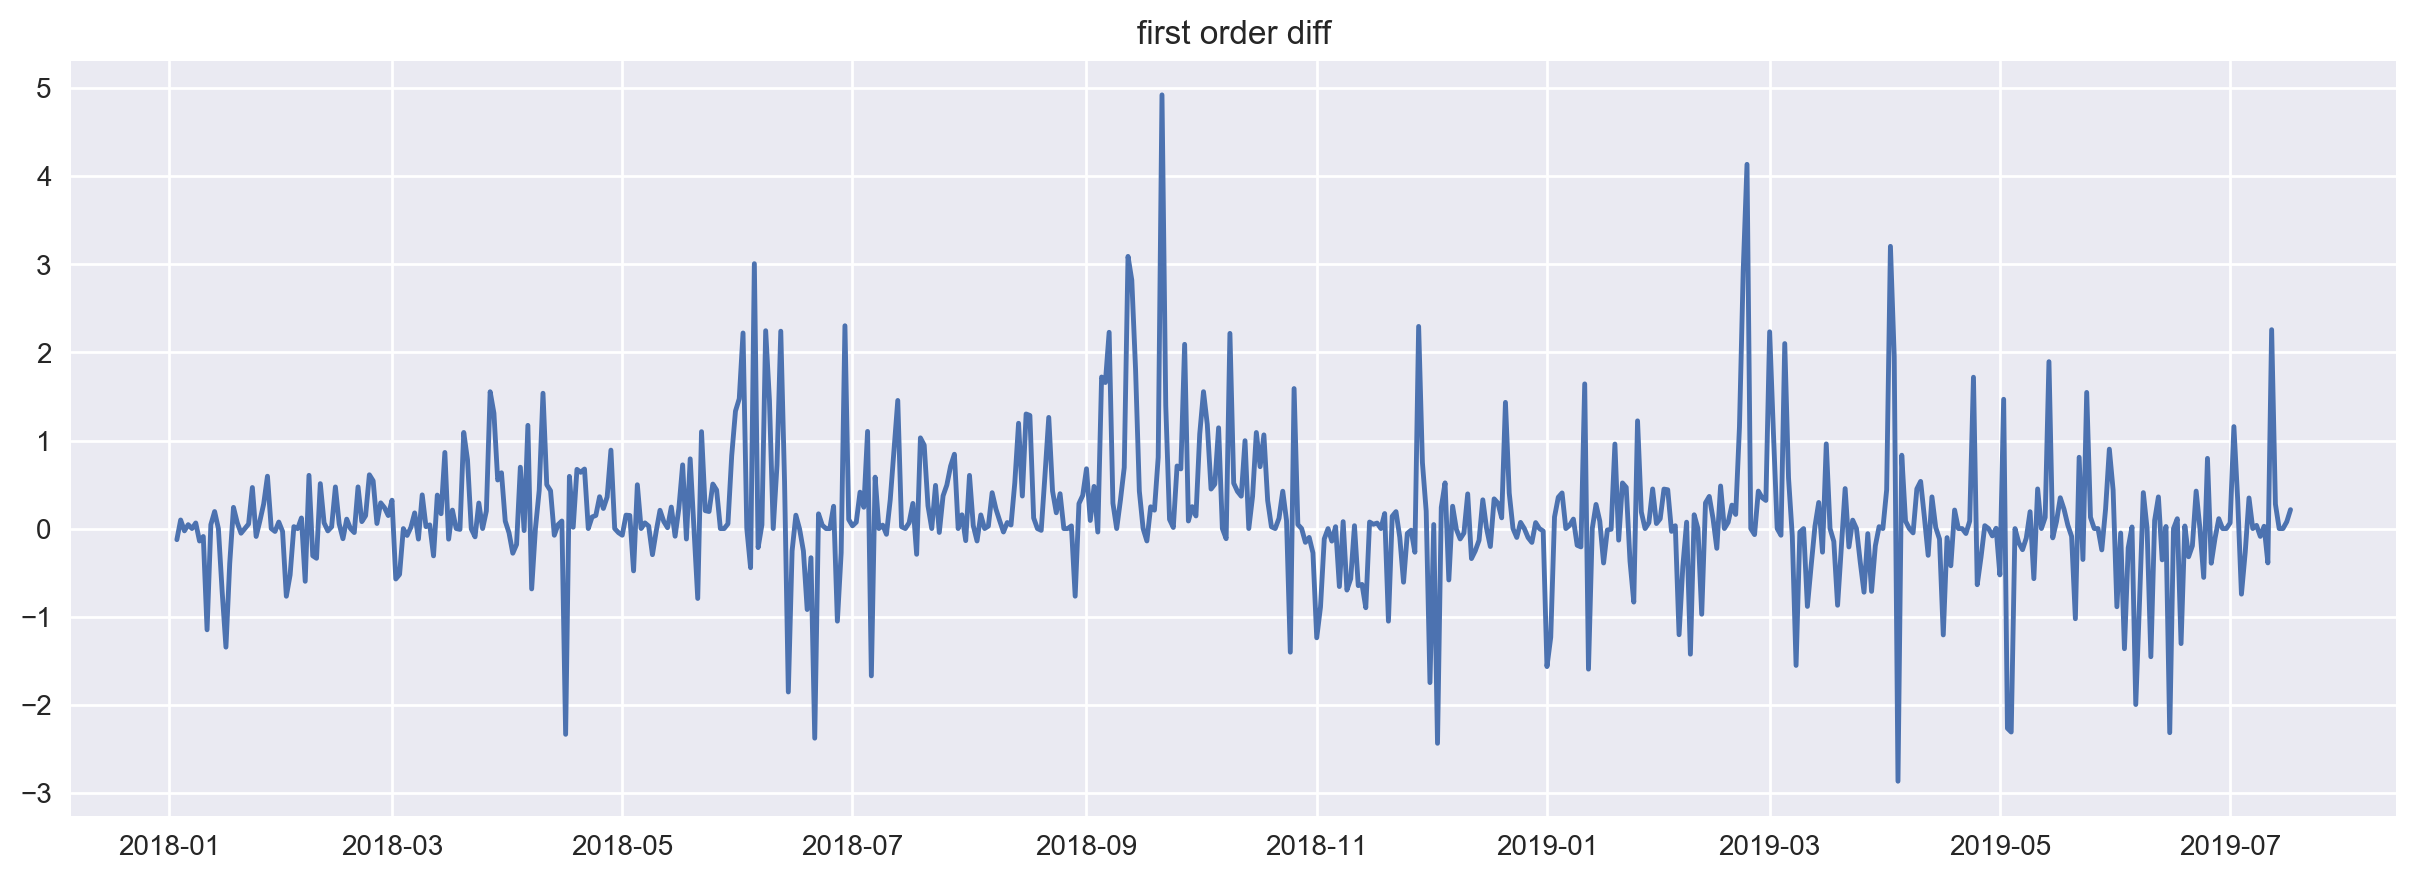

In [72]:
#first order difference

train_diff = std_train.diff()
train_diff = train_diff.dropna()

plt.figure(dpi=200,figsize=(15,5))
plt.plot(train_diff)
plt.title('first order diff')


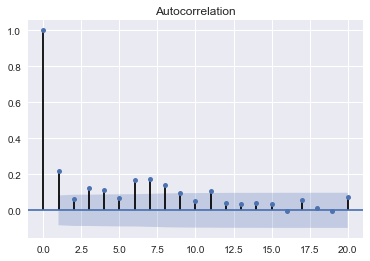

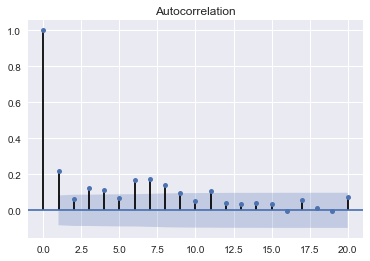

In [74]:
plot_acf(train_diff,lags=20)

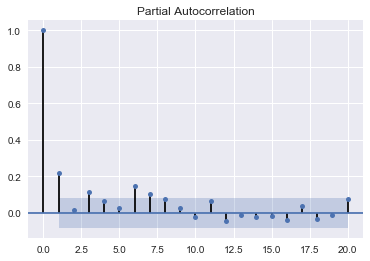

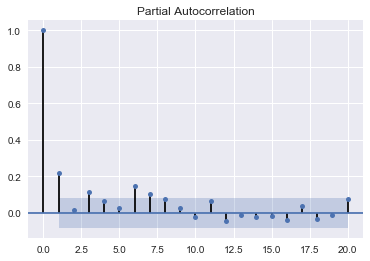

In [75]:
plot_pacf(train_diff,lags=20)

In [76]:
# search for  Optimal parameters p,d,q
import numpy as np
import itertools

p_min = 2
d_min = 1
q_min = 2
p_max = 8
d_max = 1
q_max = 8

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = ARIMA(std_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

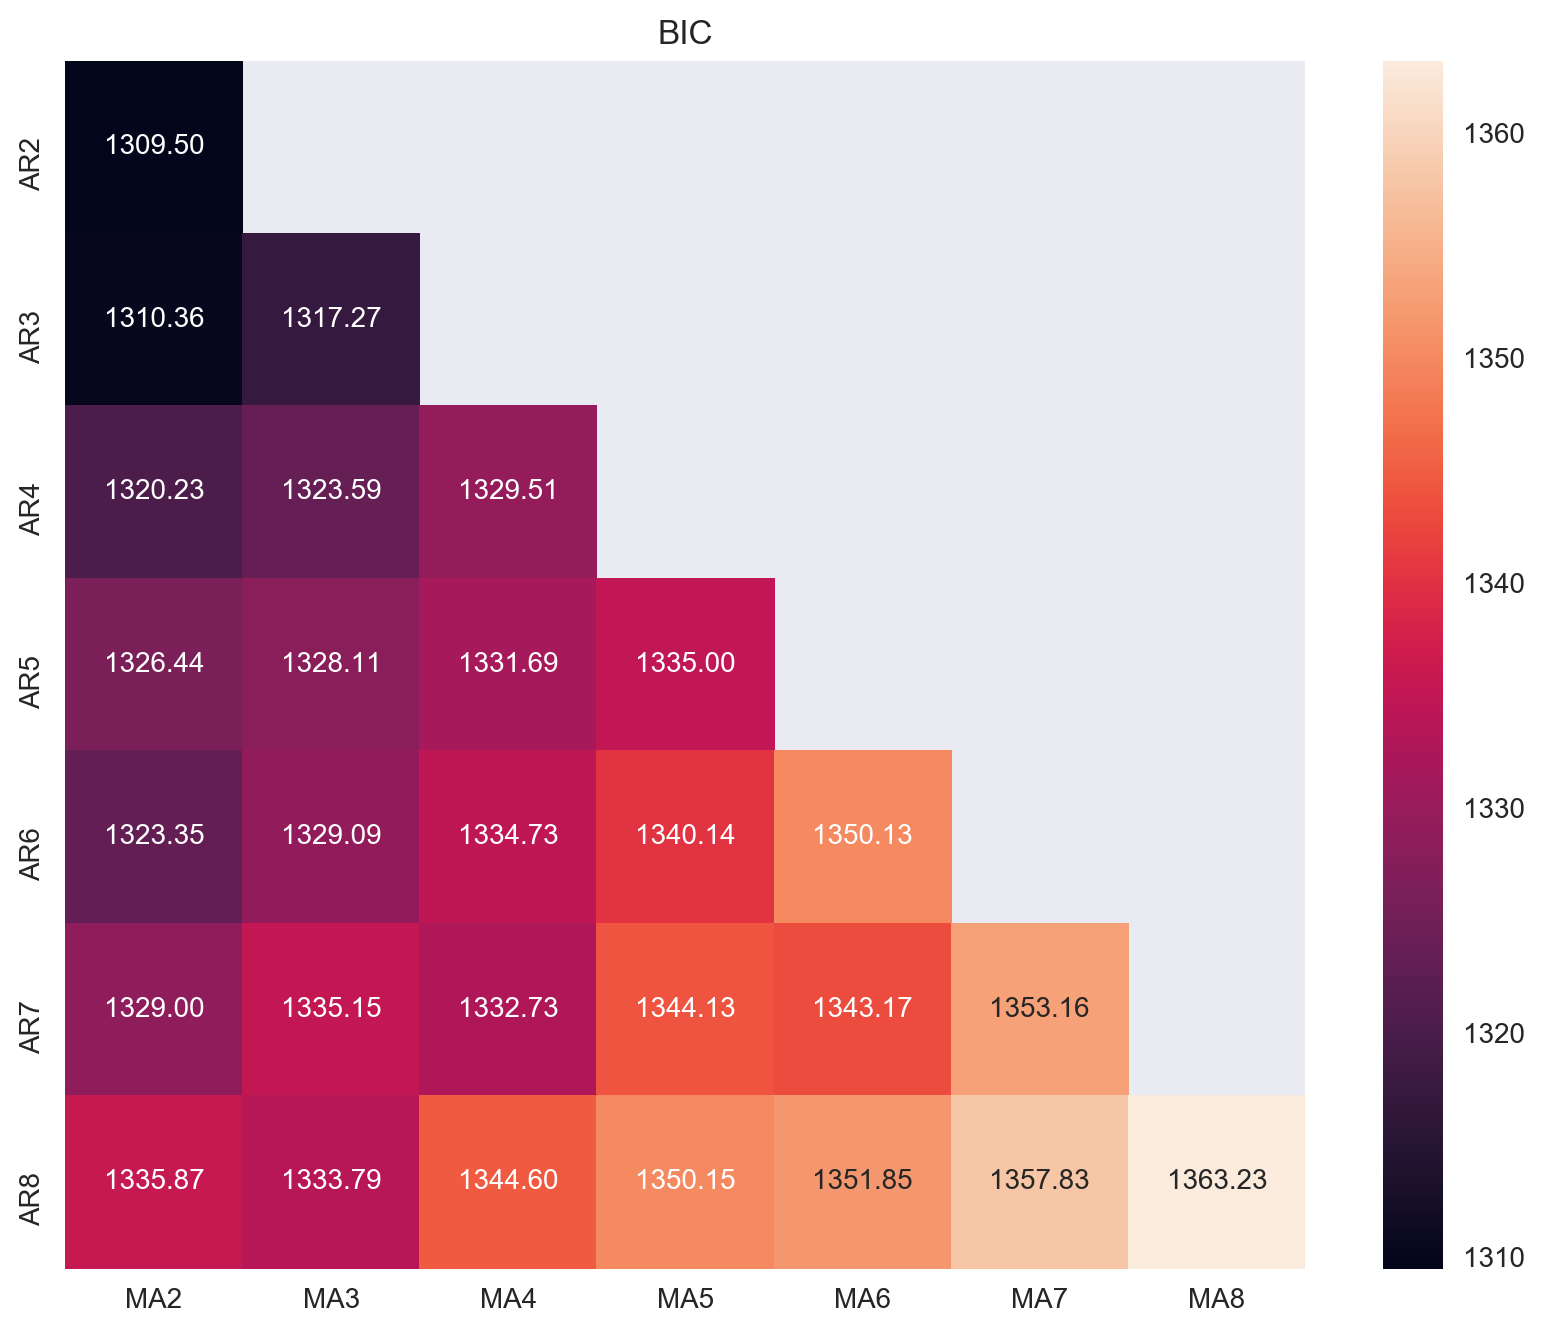

In [77]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=200)
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');
plt.savefig('ARIMA_std.png')

In [81]:
model_std = ARIMA(std_train, order=(2, 1, 2))
result_std = model_std.fit()
print(result_std.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.cost_mean   No. Observations:                  561
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.762
Method:                       css-mle   S.D. of innovations              0.751
Date:                Wed, 31 Jul 2019   AIC                           1283.524
Time:                        12:23:49   BIC                           1309.502
Sample:                    01-03-2018   HQIC                          1293.667
                         - 07-17-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1542      0.079      1.940      0.053      -0.002       0.310
ar.L1.D.cost_mean     0.6046      0.216      2.805      0.005       0.182       1.027
ar.L2.D.cost_mean     0.

In [85]:
e772_train = e7_med_72[['date','cost_mean']]
e772_train.index = e772_train.date
e772_train = e7_med_72[['date','cost_mean']]
e772_train.index = e772_train.date

del e772_train['date']
del e772_train['date']

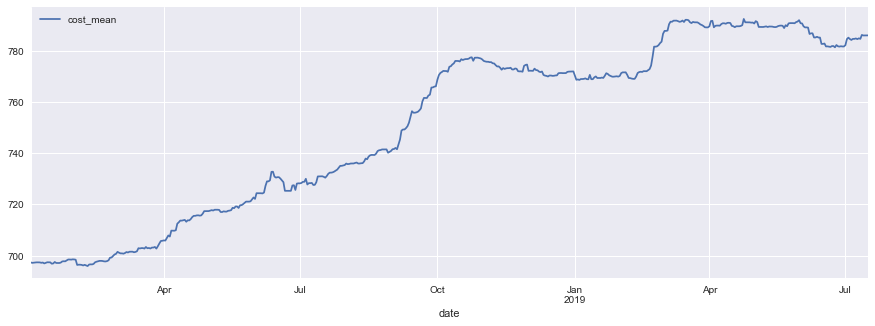

In [88]:
e772_train = e772_train[e772_train.index>'20180101']
e772_train.plot(figsize=(15,5))

Text(0.5, 1.0, 'residual')

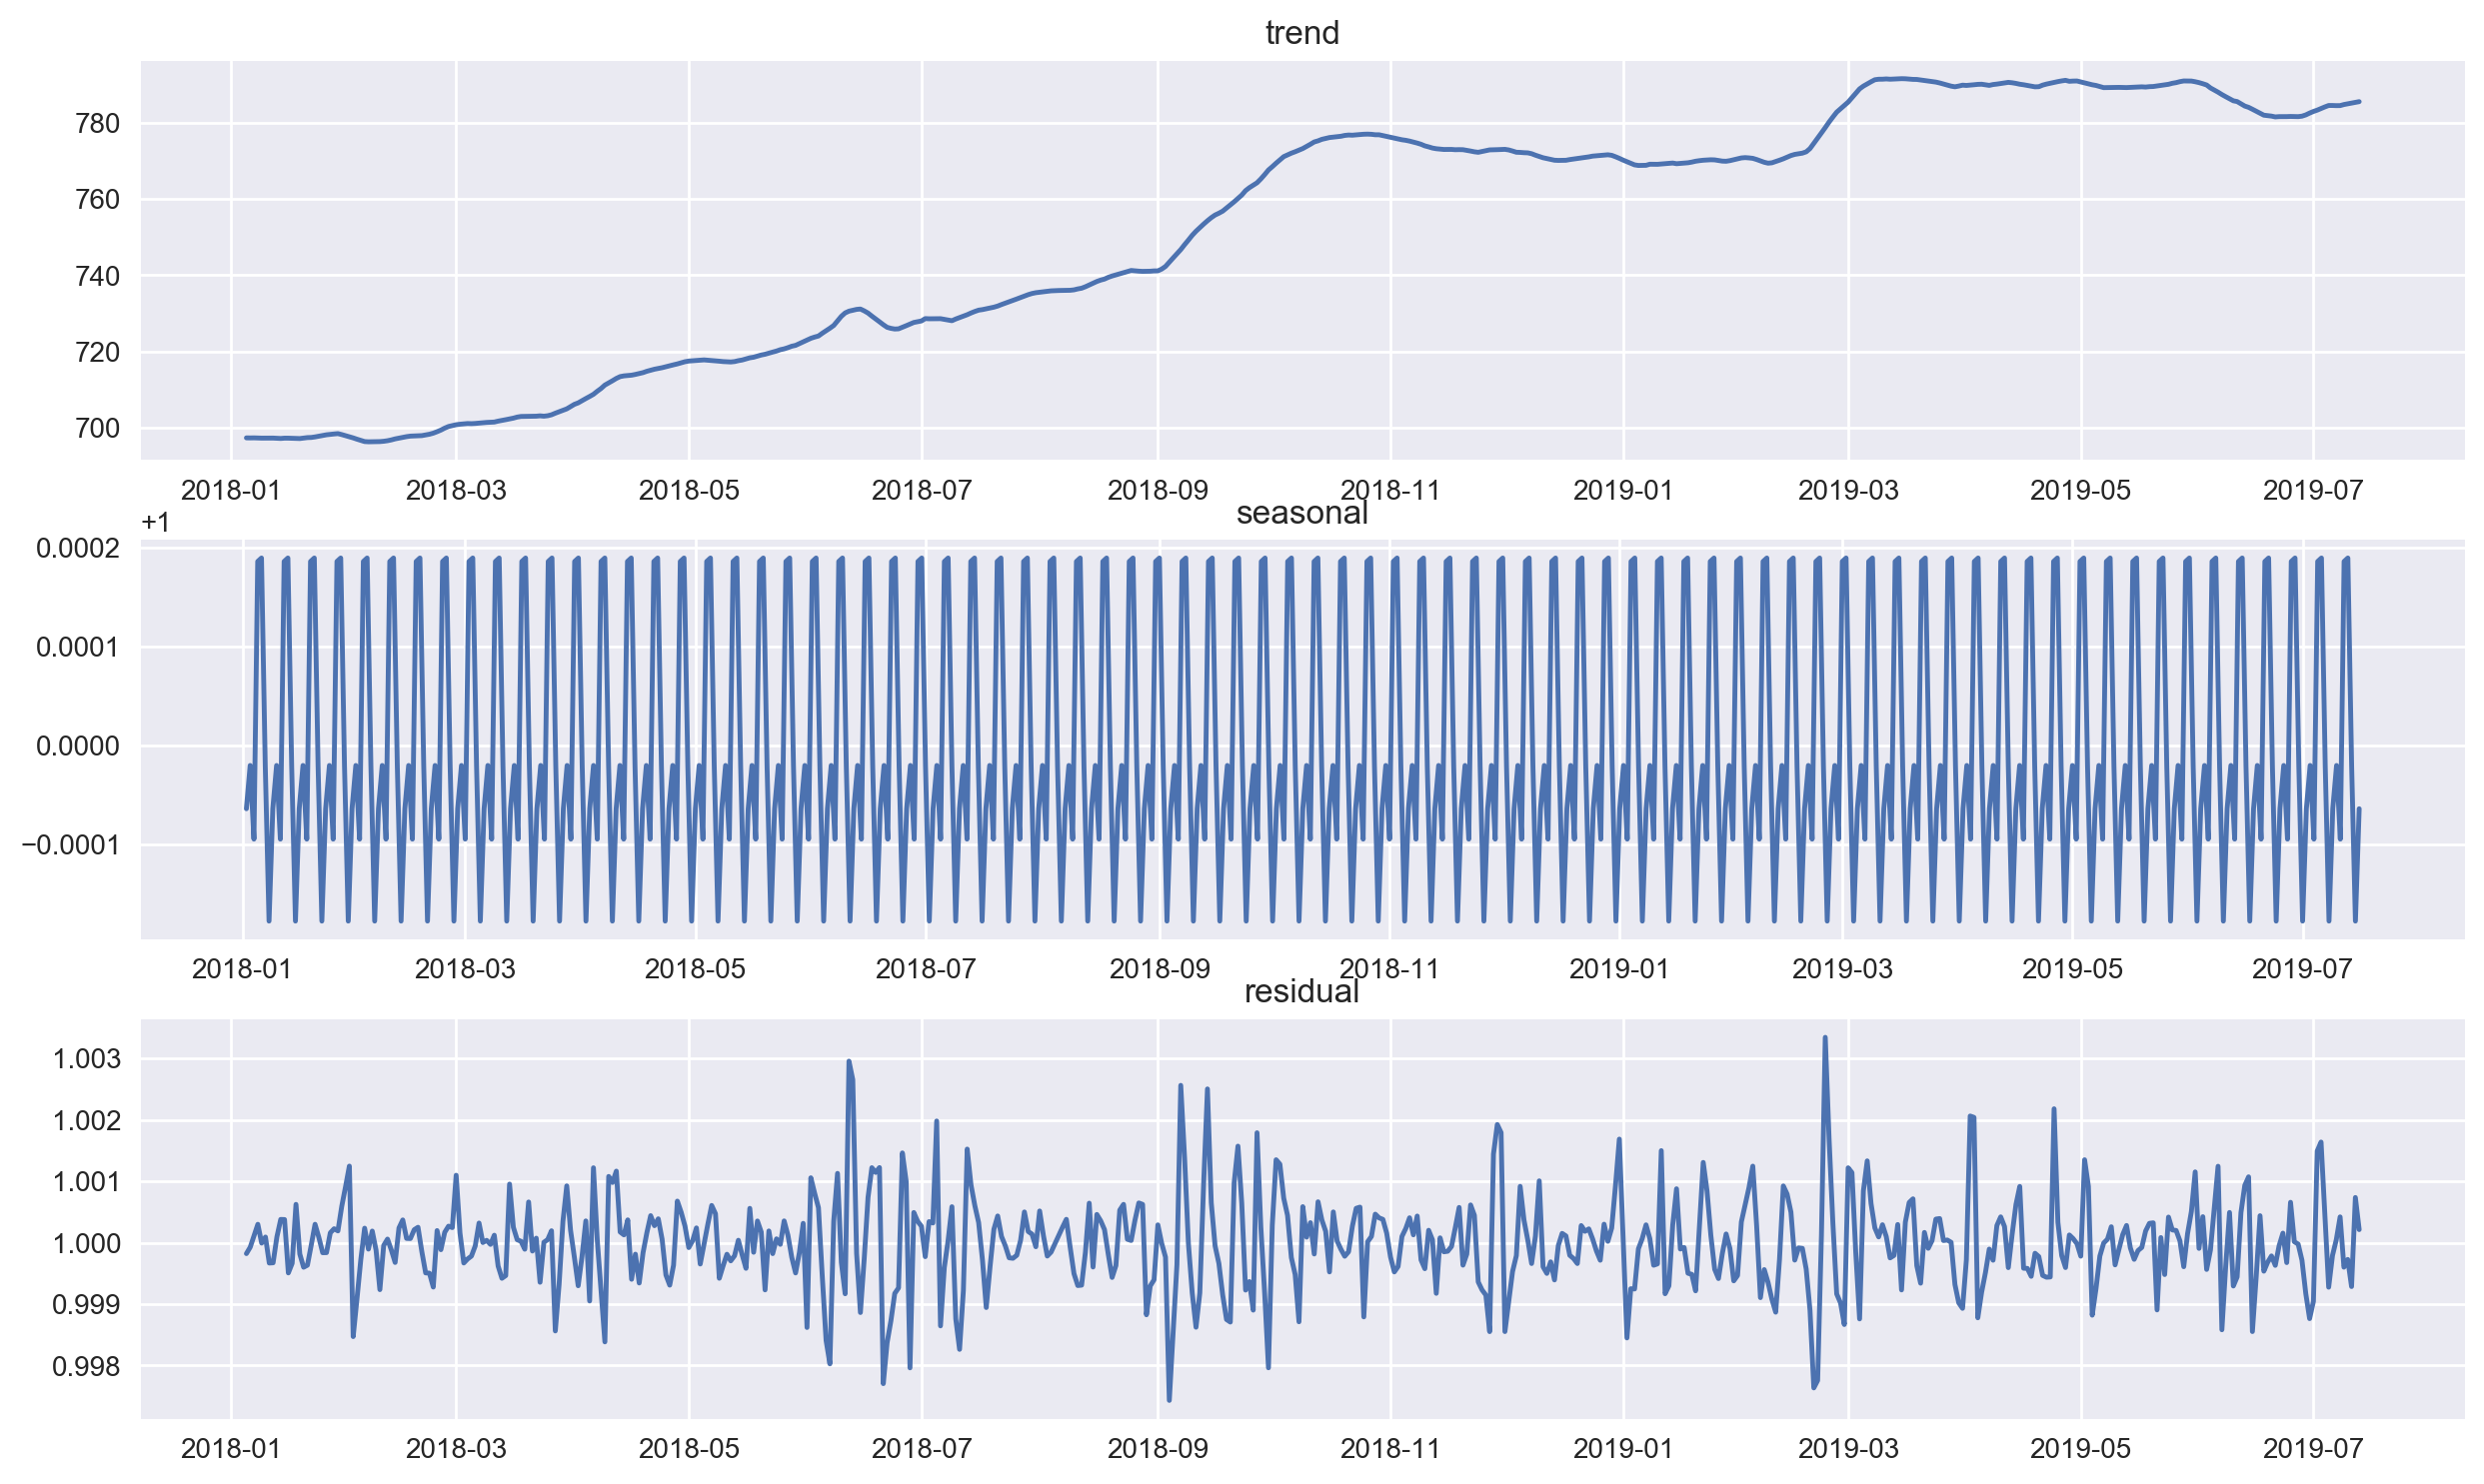

In [89]:
# decomposition
decomposition =seasonal_decompose(e772_train,model='mul')
e772_train.trend = decomposition.trend
e772_train.seasonal = decomposition.seasonal
e772_train.residual = decomposition.resid

plt.figure(figsize=(15,9),dpi=200)
plt.subplot(311)
plt.plot(e772_train.trend)
plt.title('trend')
plt.subplot(312)
plt.plot(e772_train.seasonal)
plt.title('seasonal')
plt.subplot(313)
plt.plot(e772_train.residual)
plt.title('residual')

In [90]:
# search for  Optimal parameters p,d,q
import numpy as np
import itertools

p_min = 2
d_min = 1
q_min = 2
p_max = 8
d_max = 1
q_max = 8

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = ARIMA(e772_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

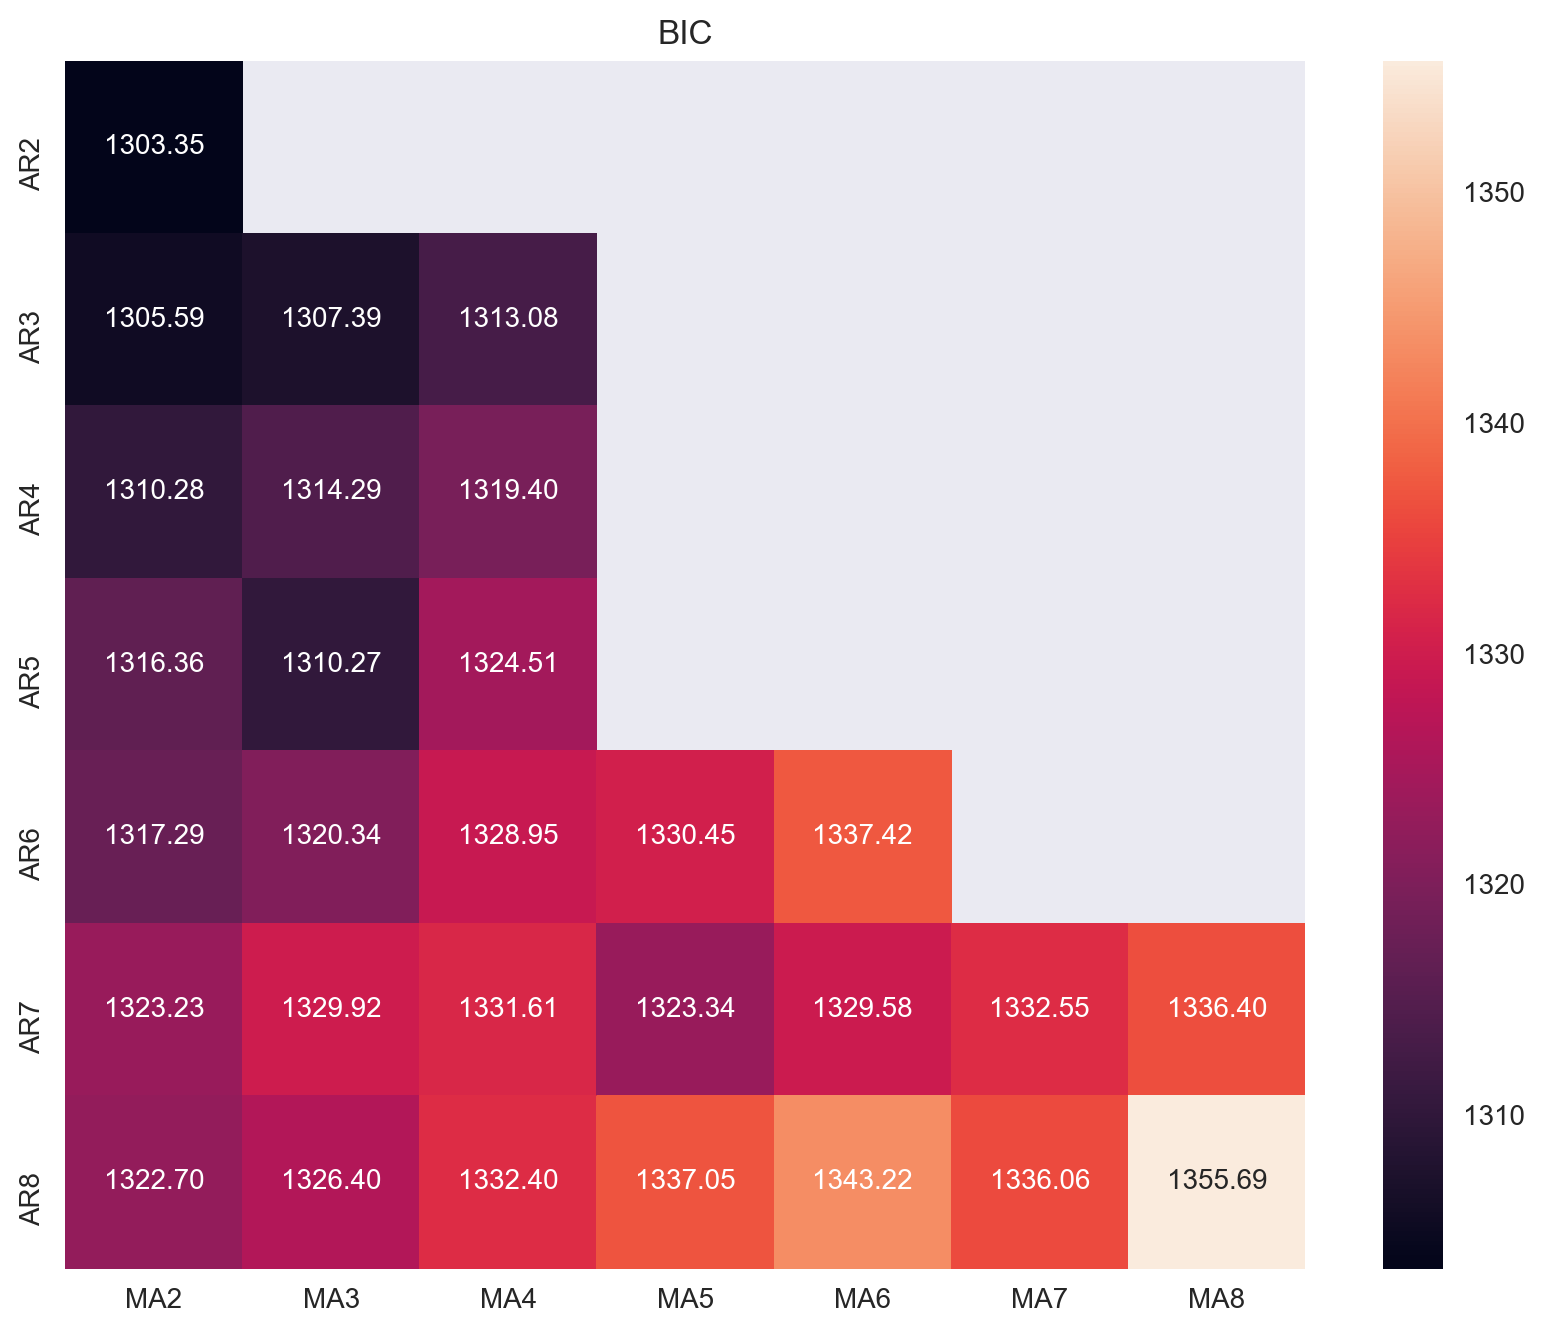

In [91]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=200)
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');
plt.savefig('ARIMA_e772.png')

In [92]:
model_e772 = ARIMA(e772_train, order=(2, 1, 2))
result_e772 = model_e772.fit()
print(result_std.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.cost_mean   No. Observations:                  561
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.762
Method:                       css-mle   S.D. of innovations              0.751
Date:                Wed, 31 Jul 2019   AIC                           1283.524
Time:                        12:58:24   BIC                           1309.502
Sample:                    01-03-2018   HQIC                          1293.667
                         - 07-17-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1542      0.079      1.940      0.053      -0.002       0.310
ar.L1.D.cost_mean     0.6046      0.216      2.805      0.005       0.182       1.027
ar.L2.D.cost_mean     0.

In [93]:
e775_train = e7_med_75[['date','cost_mean']]
e775_train.index = e775_train.date
e775_train = e7_med_75[['date','cost_mean']]
e775_train.index = e775_train.date

del e775_train['date']

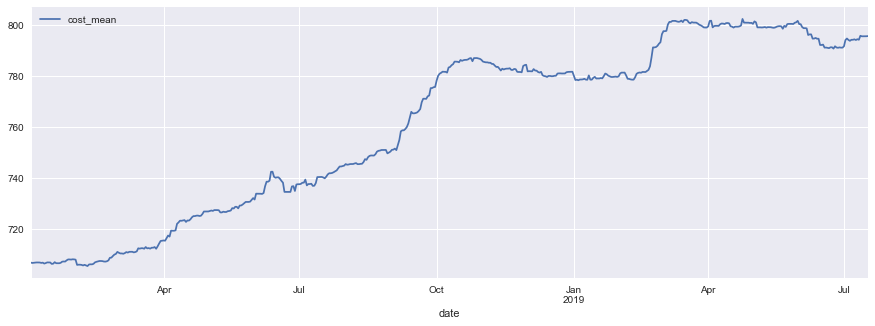

In [94]:
e775_train = e775_train[e775_train.index>'20180101']
e775_train.plot(figsize=(15,5))

Text(0.5, 1.0, 'residual')

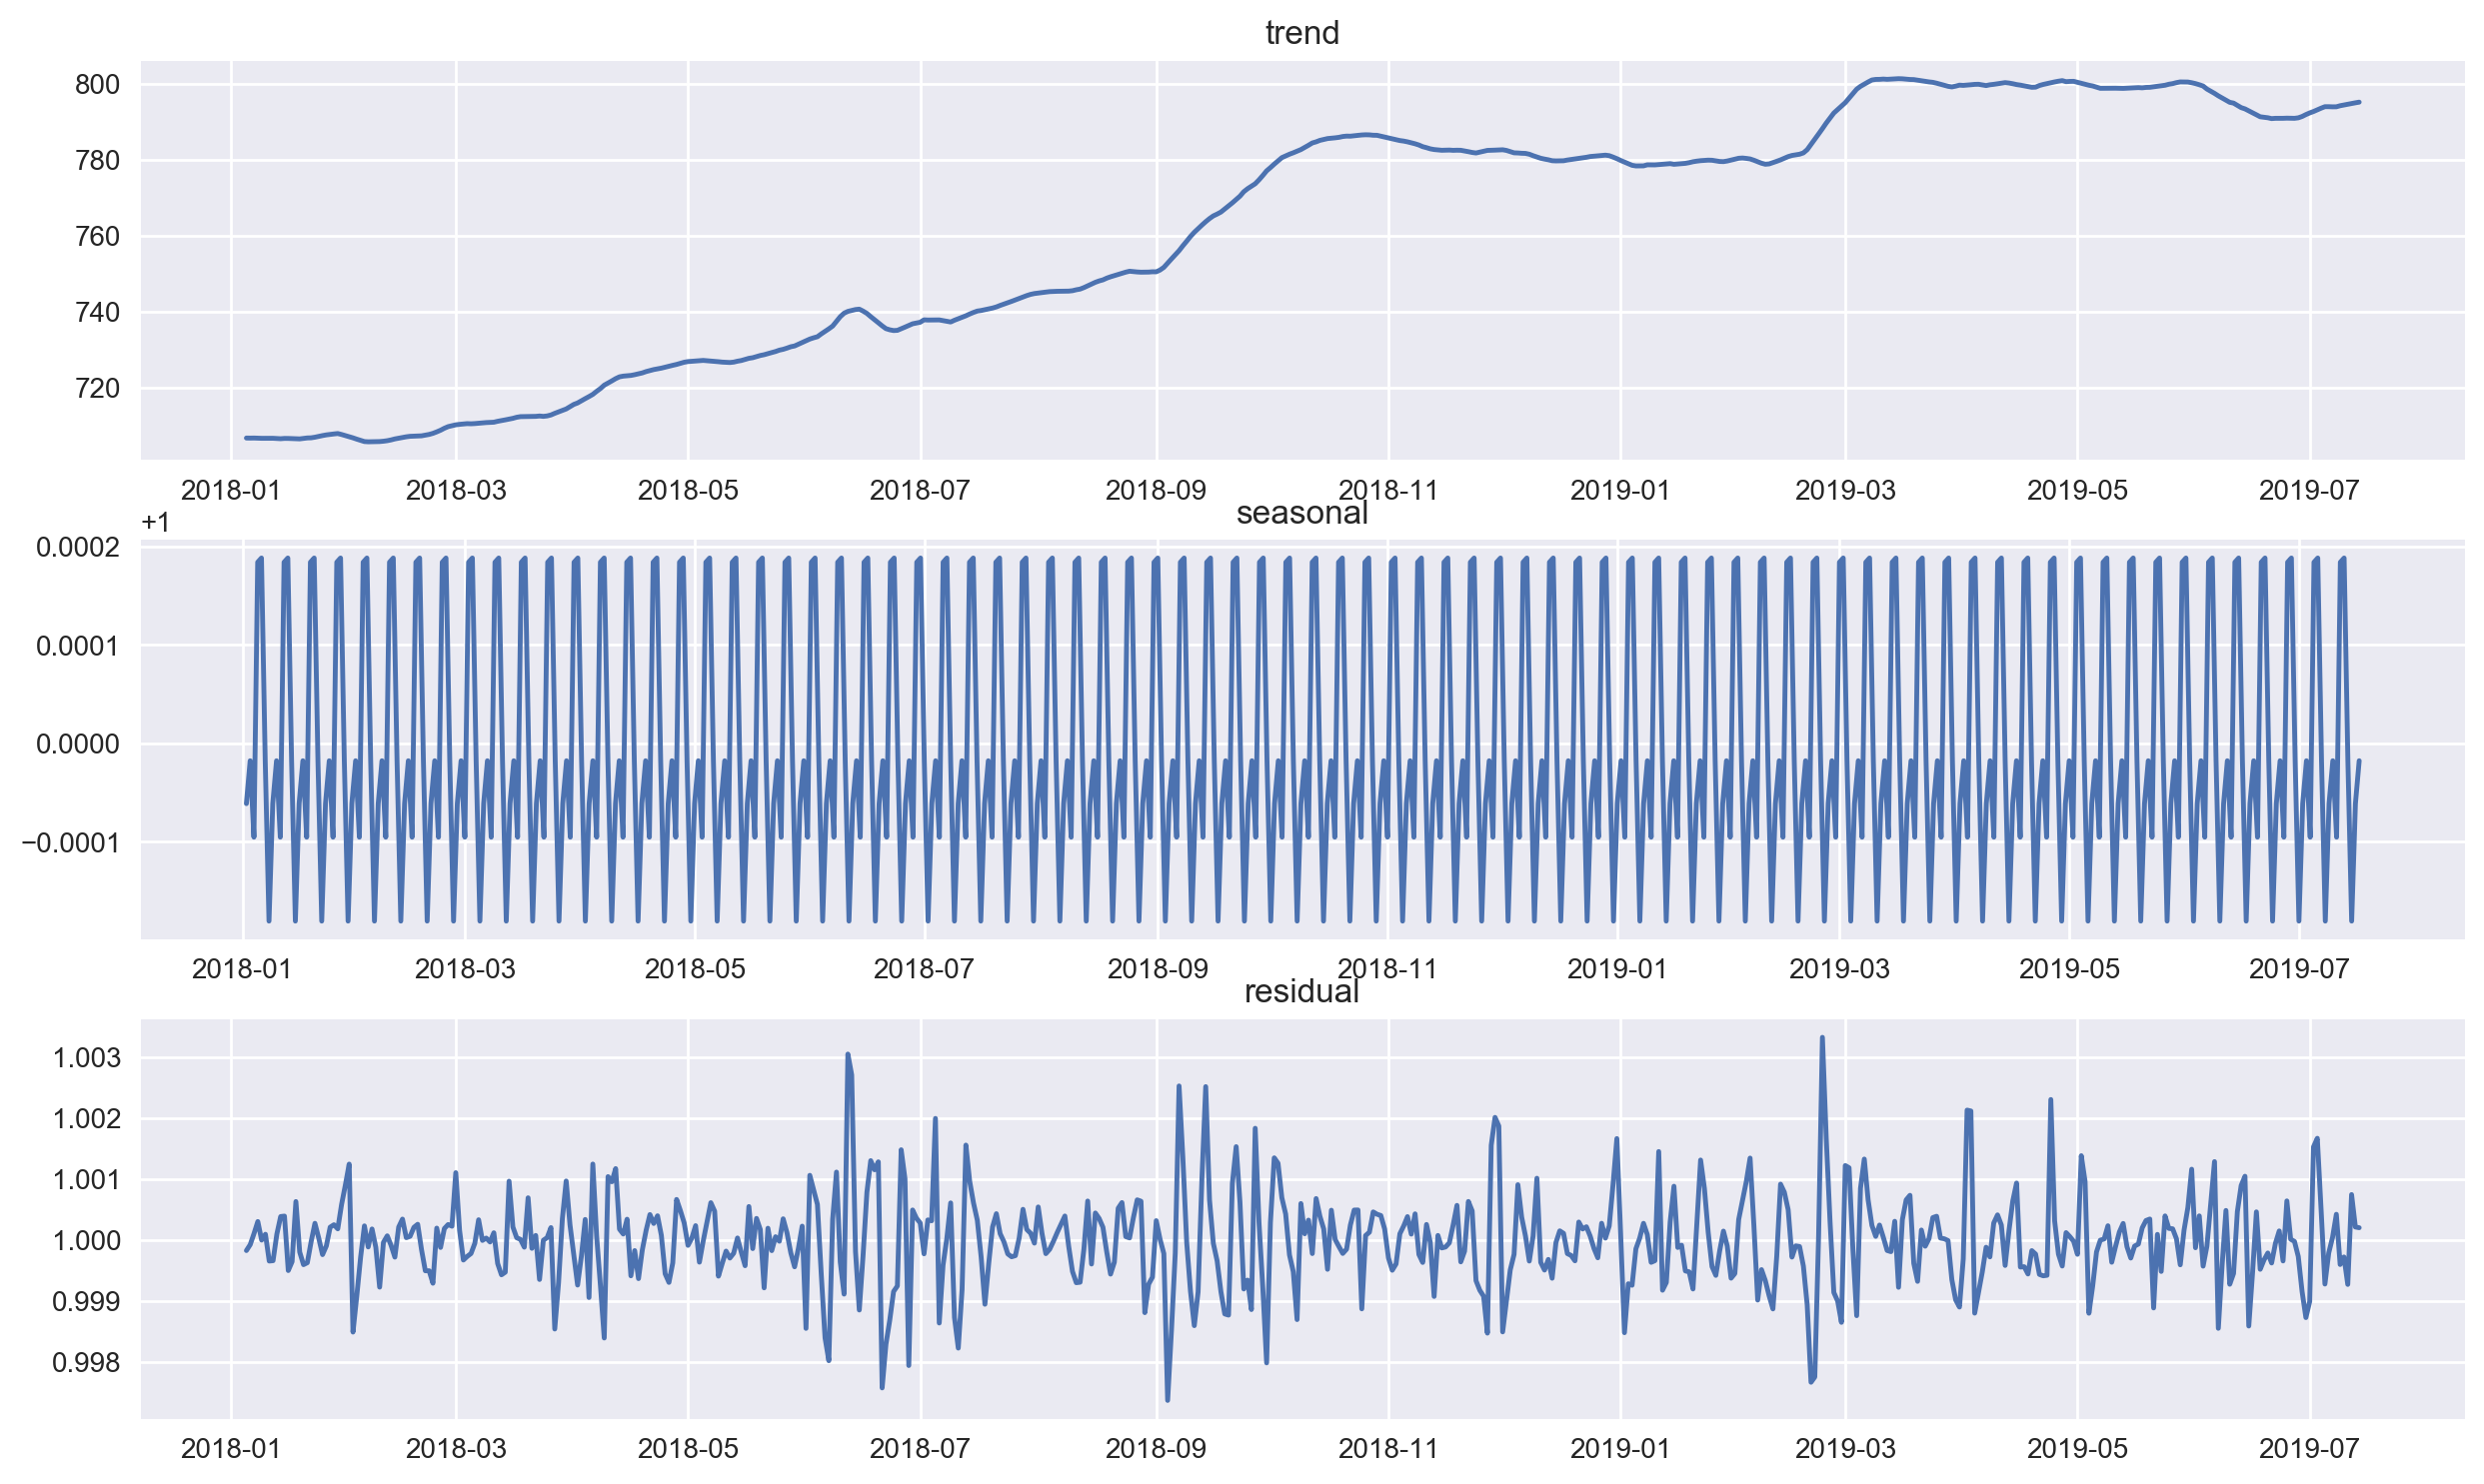

In [95]:
# decomposition
decomposition =seasonal_decompose(e775_train,model='mul')
e775_train.trend = decomposition.trend
e775_train.seasonal = decomposition.seasonal
e775_train.residual = decomposition.resid

plt.figure(figsize=(15,9),dpi=200)
plt.subplot(311)
plt.plot(e775_train.trend)
plt.title('trend')
plt.subplot(312)
plt.plot(e775_train.seasonal)
plt.title('seasonal')
plt.subplot(313)
plt.plot(e775_train.residual)
plt.title('residual')

In [96]:
# search for  Optimal parameters p,d,q
import numpy as np
import itertools

p_min = 2
d_min = 1
q_min = 2
p_max = 8
d_max = 1
q_max = 8

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
    
    try:
        model = ARIMA(e775_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

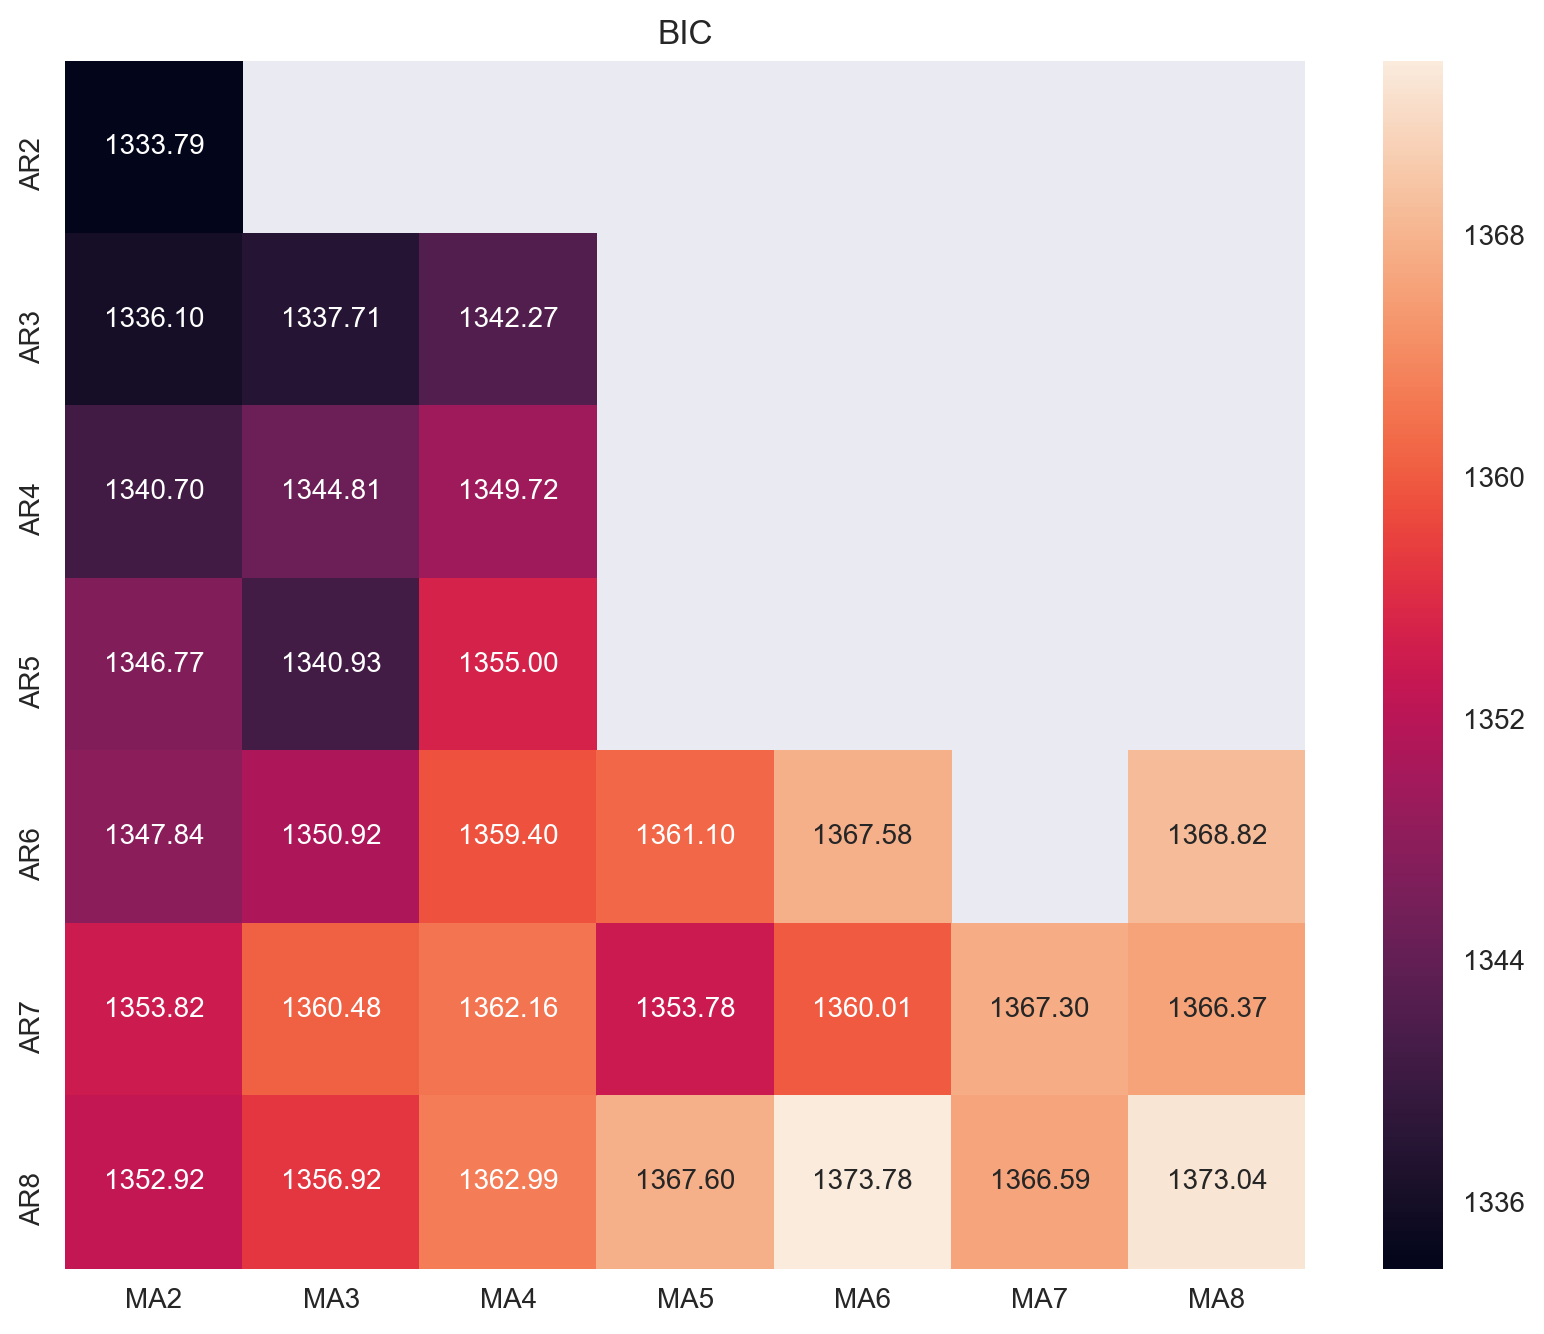

In [97]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=200)
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 );
ax.set_title('BIC');
plt.savefig('ARIMA_e775.png')

In [98]:
model_e775 = ARIMA(e775_train, order=(2, 1, 2))
result_e775 = model_e775.fit()
print(result_std.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.cost_mean   No. Observations:                  561
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.762
Method:                       css-mle   S.D. of innovations              0.751
Date:                Wed, 31 Jul 2019   AIC                           1283.524
Time:                        13:14:35   BIC                           1309.502
Sample:                    01-03-2018   HQIC                          1293.667
                         - 07-17-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1542      0.079      1.940      0.053      -0.002       0.310
ar.L1.D.cost_mean     0.6046      0.216      2.805      0.005       0.182       1.027
ar.L2.D.cost_mean     0.

In [108]:
pred_index = pd.date_range(start='2019-07-18', periods=60)

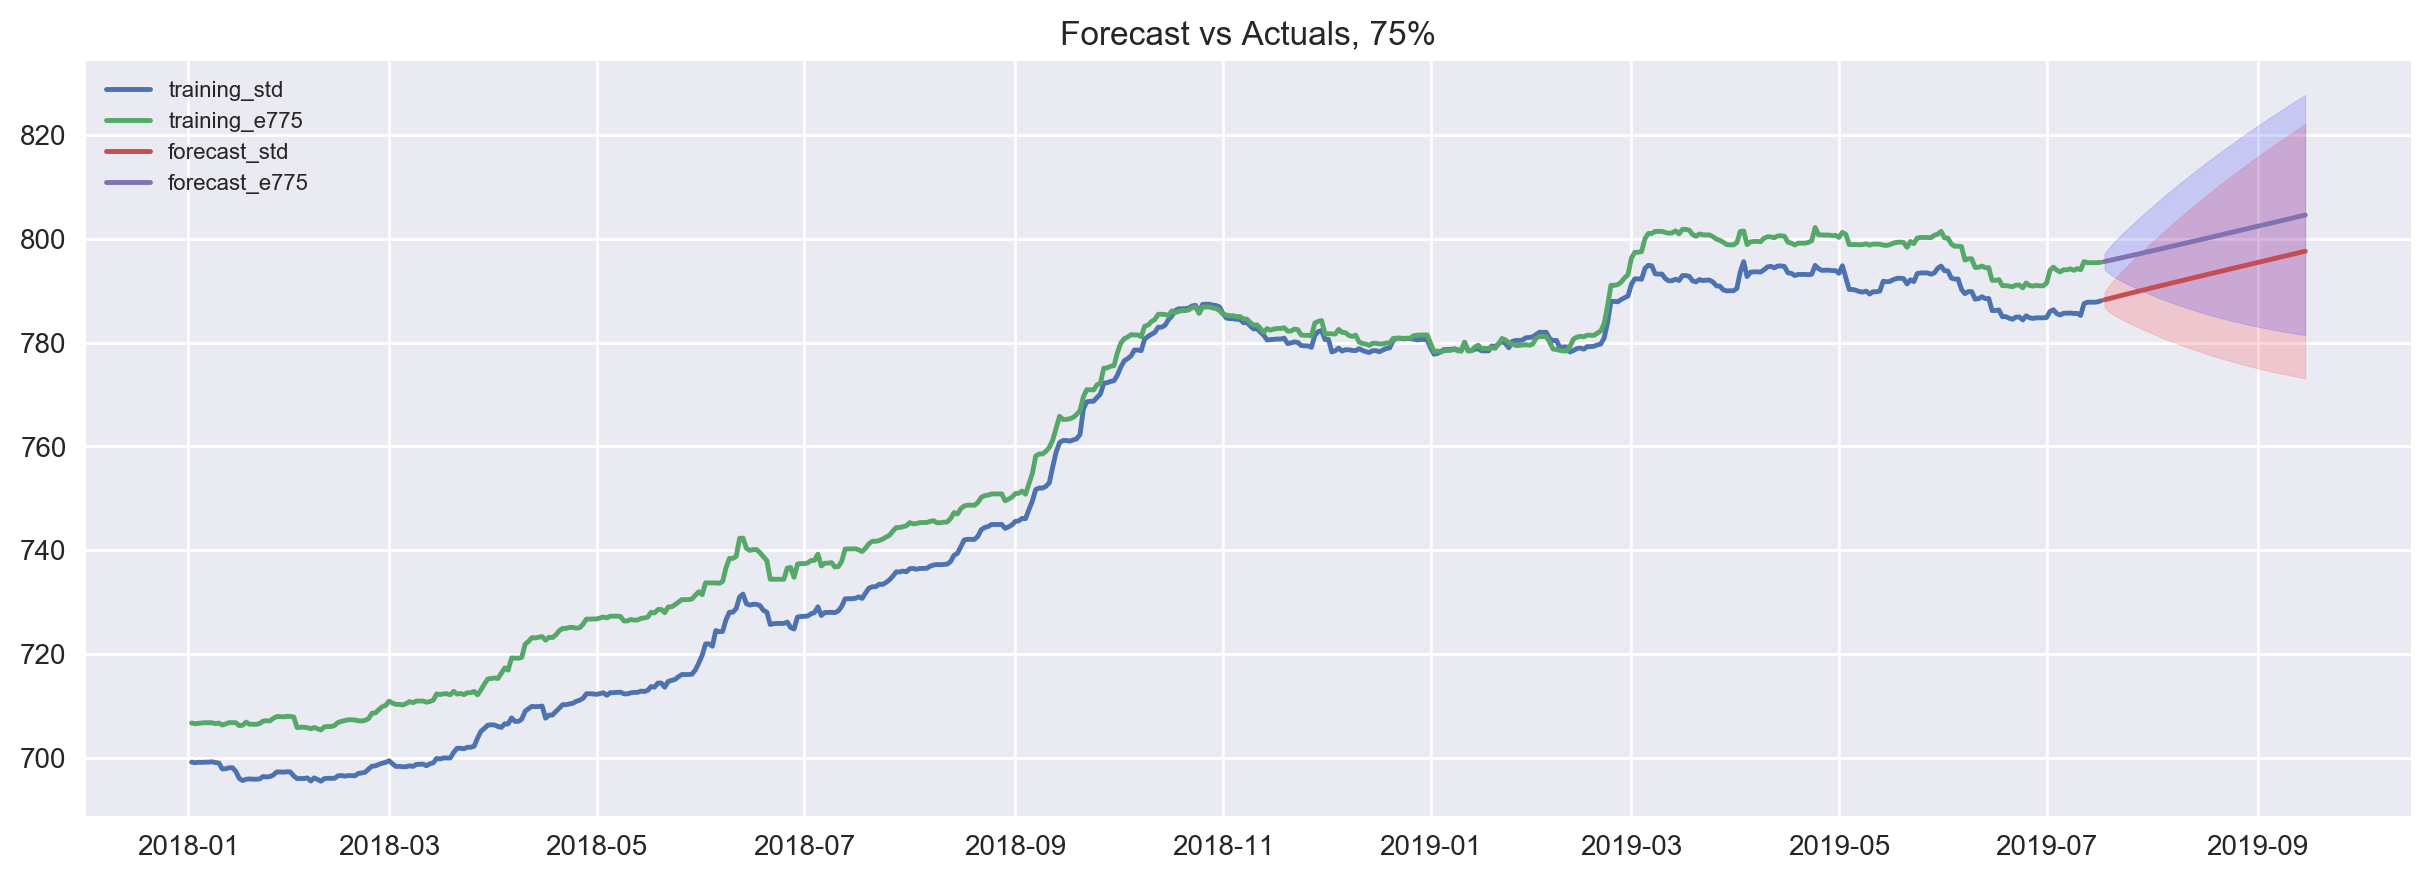

In [109]:
# Build Model
 
fitted_std = model_std.fit(disp=-1)
fitted_e775 = model_e775.fit(disp=-1)

# Forecast
fc_std, se, conf = fitted_std.forecast(60, alpha=0.05)  # 95% conf
fc_e775, se_e775, conf_e775 = fitted_e775.forecast(60, alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(15,5), dpi=200)
plt.plot(std_train, label='training_std')
fc_series_std = pd.Series(fc_std, index=pred_index)
plt.plot(e775_train, label='training_e775')
fc_series_e775 = pd.Series(fc_e775, index=pred_index)

lower_series_std = pd.Series(conf[:, 0], index=pred_index)
upper_series_std = pd.Series(conf[:, 1], index=pred_index)
lower_series_e775 = pd.Series(conf_e775[:, 0], index=pred_index)
upper_series_e775 = pd.Series(conf_e775[:, 1], index=pred_index)

plt.plot(fc_series_std, label='forecast_std')
plt.fill_between(lower_series_std.index, lower_series_std, upper_series_std, 
                 color='r', alpha=.15)
plt.plot(fc_series_e775, label='forecast_e775')
plt.fill_between(lower_series_e775.index, lower_series_e775, upper_series_e775, 
                 color='b', alpha=.15)

plt.title('Forecast vs Actuals, 75%')
plt.legend(loc='upper left', fontsize=8)


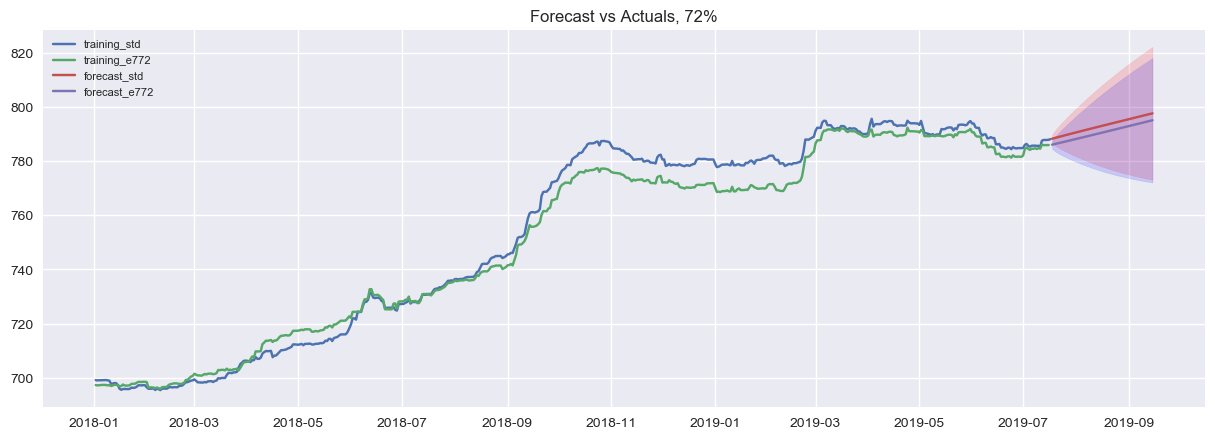

In [111]:
# Build Model
 
fitted_std = model_std.fit(disp=-1)
fitted_e772 = model_e772.fit(disp=-1)

# Forecast
fc_std, se, conf = fitted_std.forecast(60, alpha=0.05)  # 95% conf
fc_e772, se_e772, conf_e772 = fitted_e772.forecast(60, alpha=0.05)  # 95% conf

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(std_train, label='training_std')
fc_series_std = pd.Series(fc_std, index=pred_index)
plt.plot(e772_train, label='training_e772')
fc_series_e772 = pd.Series(fc_e772, index=pred_index)

lower_series_std = pd.Series(conf[:, 0], index=pred_index)
upper_series_std = pd.Series(conf[:, 1], index=pred_index)
lower_series_e772 = pd.Series(conf_e772[:, 0], index=pred_index)
upper_series_e772 = pd.Series(conf_e772[:, 1], index=pred_index)

plt.plot(fc_series_std, label='forecast_std')
plt.fill_between(lower_series_std.index, lower_series_std, upper_series_std, 
                 color='r', alpha=.15)
plt.plot(fc_series_e772, label='forecast_e772')
plt.fill_between(lower_series_e772.index, lower_series_e772, upper_series_e772, 
                 color='b', alpha=.15)

plt.title('Forecast vs Actuals, 72%')
plt.legend(loc='upper left', fontsize=8)
